# **Report:** Exploratory Data Analysis on "Most streamed tracks in Spotify 2023" dataset.

**Motivation:** Understand the factors that drive the popularity, engagement, and overall success of top Spotify tracks in 2023.

In [556]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

## Data collection

In [557]:
df = pd.read_csv("../data/Spotify_Data.csv")

In [558]:
type(df)

pandas.core.frame.DataFrame

In [559]:
df.head(10)


track_name              artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%                                          cover_url
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook             2           2023               7            14                   553                147  141381703                  43              263                  45                10              826  125   B  Major              80         89        83              31                   0           8              4                                          Not Found
1                                 LALA                 Myke Towers             1           2023               3            23                  1474                 48  133716286                  48              126                  58                14              382   92  C#  Major              71         61        74               7                   0          10              4  https://i.scdn.co/image/ab67616d0000b2730656d5...
2                              vampire              Olivia Rodrigo             1           2023               6            30                  1397                113  140003974                  94              207                  91                14              949  138   F  Major              51         32        53              17                   0          31              6  https://i.scdn.co/image/ab67616d0000b273e85259...
3                         Cruel Summer                Taylor Swift             1           2019               8            23                  7858                100  800840817                 116              207                 125                12              548  170   A  Major              55         58        72              11                   0          11             15  https://i.scdn.co/image/ab67616d0000b273e787cf...
4                       WHERE SHE GOES                   Bad Bunny             1           2023               5            18                  3133                 50  303236322                  84              133                  87                15              425  144   A  Minor              65         23        80              14                  63          11              6  https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5                             Sprinter           Dave, Central Cee             2           2023               6             1                  2186                 91  183706234                  67              213                  88                17              946  141  C#  Major              92         66        58              19                   0           8             24  https://i.scdn.co/image/ab67616d0000b273e3a09a...
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma             2           2023               3            16                  3090                 50  725980112                  34              222                  43                13              418  148   F  Minor              67         83        76              48                   0           8              3  https://i.scdn.co/image/ab67616d0000b2732071a0...
7                             Columbia                     Quevedo             1           2023               7             7                   714                 43   58149378                  25               89                  30                13              194  100   F  Major              67         26        71              37                   0          11              4  https://i.scdn.co/image/ab67616d0000b273a00a81...
8                             fukumean                       Gunna             1           2023

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Data cleaning & pre-processing


In [561]:
print(df.duplicated().sum()) #Check for duplicates

0


In [562]:
""" Summarizing data """

def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key= lambda item: item[1], reverse=True )}
        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)    


col_name col_dtype  num_of_nulls  num_of_non_nulls  num_of_distinct_values                             distinct_values_counts
0             track_name    object             0               953                     943  {'Flowers': 2, 'Daylight': 2, 'Let It Snow! Le...
1         artist(s)_name    object             0               953                     645  {'Taylor Swift': 34, 'The Weeknd': 22, 'Bad Bu...
2           artist_count     int64             0               953                       8  {1: 587, 2: 254, 3: 85, 4: 15, 5: 5, 6: 3, 8: ...
3          released_year     int64             0               953                      50  {2022: 402, 2023: 175, 2021: 119, 2020: 37, 20...
4         released_month     int64             0               953                      12  {1: 134, 5: 128, 3: 86, 6: 86, 11: 80, 12: 75,...
5           released_day     int64             0               953                      31  {1: 95, 21: 44, 13: 43, 24: 40, 7: 39, 2: 39, ...
6   in_spotify_playlists     int64             0               953                     879  {1473: 3, 685: 3, 3006: 3, 892: 3, 896: 3, 115...
7      in_spotify_charts     int64             0               953                      82  {0: 405, 4: 48, 2: 42, 6: 36, 3: 18, 8: 17, 5:...
8                streams    object             0               953                     949  {'395591396': 2, '156338624': 2, '1223481149':...
9     in_apple_playlists     int64             0               953                     234  {0: 23, 8: 22, 16: 20, 20: 20, 10: 20, 4: 20, ...
10       in_apple_charts     int64             0               953                     172  {0: 100, 1: 40, 2: 26, 3: 24, 6: 16, 5: 15, 21...
11   in_deezer_playlists    object             0               953                     348  {'0': 24, '15': 23, '5': 20, '13': 20, '12': 1...
12      in_deezer_charts     int64             0               953                      34  {0: 558, 1: 137, 2: 48, 3: 31, 6: 18, 4: 18, 5...
13      in_shazam_charts    object            50               903                     198  {'0': 344, '1': 73, '2': 35, '3': 21, '4': 19,...
14                   bpm     int64             0               953                     124  {120: 39, 130: 31, 140: 31, 92: 25, 110: 24, 1...
15                   key    object            95               858                      11  {'C#': 120, 'G': 96, 'G#': 91, 'F': 89, 'B': 8...
16                  mode    object             0               953                       2                       {'Major': 550, 'Minor': 403}
17        danceability_%     int64             0               953                      72  {70: 43, 77: 32, 80: 31, 56: 30, 74: 29, 81: 2...
18             valence_%     int64             0               953                      94  {24: 21, 40: 20, 59: 18, 55: 18, 53: 18, 61: 1...
19              energy_%     int64             0               953                      80  {74: 29, 62: 28, 76: 27, 66: 25, 73: 23, 68: 2...
20        acousticness_%     int64             0               953                      98  {0: 60, 1: 48, 4: 35, 2: 33, 3: 30, 5: 30, 9: ...
21    instrumentalness_%     int64             0               953                      39  {0: 866, 1: 21, 2: 7, 4: 5, 3: 4, 5: 4, 18: 3,...
22            liveness_%     int64             0               953                      68  {11: 102, 9: 93, 10: 78, 12: 72, 8: 54, 13: 47...
23         speechiness_%     int64             0               953                      48  {4: 175, 3: 152, 5: 130, 6: 76, 8: 52, 7: 49, ...
24             cover_url    object             0               953                     535  {'Not Found': 225, 'https://i.scdn.co/image/ab...

#### Comments

1. There are a few tracks (ex: "Flowers", "Daylight") which have the same title, but aren't from the same artist. 
2. There are only two features that present null values: in_shazam_charts, key.
3. To understand what each variable represents, check out: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023.


In [563]:
""" Transforming data types & eliminating useless features"""

df["streams"] = pd.to_numeric(df["streams"],errors="coerce") #There is an entry containing metadata.
df[["key","mode"]] = df[["key","mode"]].astype("category") #Categorical features
df = df.drop(["cover_url","in_deezer_playlists","in_deezer_charts","in_shazam_charts"],axis=1) #Useless features
df = df.dropna()
df["streams"] = df["streams"].astype("int64")


In [564]:
summary_df = column_summary(df)
display(summary_df)

col_name col_dtype  num_of_nulls  num_of_non_nulls  num_of_distinct_values                             distinct_values_counts
0             track_name    object             0               857                     851  {'About Damn Time': 2, 'Die For You': 2, 'Let ...
1         artist(s)_name    object             0               857                     596  {'Taylor Swift': 29, 'The Weeknd': 17, 'SZA': ...
2           artist_count     int64             0               857                       8  {1: 526, 2: 231, 3: 76, 4: 14, 5: 5, 6: 3, 8: ...
3          released_year     int64             0               857                      47  {2022: 362, 2023: 159, 2021: 107, 2019: 33, 20...
4         released_month     int64             0               857                      12  {1: 120, 5: 118, 6: 78, 3: 76, 12: 70, 11: 69,...
5           released_day     int64             0               857                      31  {1: 87, 21: 39, 2: 38, 4: 38, 6: 37, 13: 36, 2...
6   in_spotify_playlists     int64             0               857                     796  {896: 3, 86: 3, 356: 3, 811: 3, 892: 3, 685: 2...
7      in_spotify_charts     int64             0               857                      78  {0: 364, 4: 42, 2: 37, 6: 33, 8: 17, 3: 16, 1:...
8                streams     int64             0               857                     854  {723894473: 2, 1223481149: 2, 156338624: 2, 84...
9     in_apple_playlists     int64             0               857                     224  {8: 21, 0: 20, 20: 19, 10: 19, 4: 19, 5: 18, 7...
10       in_apple_charts     int64             0               857                     168  {0: 93, 1: 35, 3: 23, 2: 22, 6: 15, 5: 14, 7: ...
11                   bpm     int64             0               857                     123  {120: 34, 130: 28, 140: 26, 92: 22, 150: 21, 1...
12                   key  category             0               857                      11  {'C#': 120, 'G': 96, 'G#': 91, 'F': 89, 'D': 8...
13                  mode  category             0               857                       2                       {'Major': 474, 'Minor': 383}
14        danceability_%     int64             0               857                      72  {70: 37, 80: 30, 56: 27, 77: 27, 74: 27, 81: 2...
15             valence_%     int64             0               857                      94  {24: 21, 40: 19, 55: 17, 53: 16, 59: 16, 61: 1...
16              energy_%     int64             0               857                      78  {74: 28, 62: 28, 76: 26, 66: 24, 73: 23, 60: 2...
17        acousticness_%     int64             0               857                      95  {0: 52, 1: 48, 4: 33, 2: 30, 3: 29, 9: 28, 5: ...
18    instrumentalness_%     int64             0               857                      36  {0: 780, 1: 19, 2: 5, 3: 4, 5: 4, 4: 4, 63: 3,...
19            liveness_%     int64             0               857                      67  {11: 93, 9: 82, 10: 69, 12: 65, 8: 50, 13: 43,...
20         speechiness_%     int64             0               857                      48  {4: 155, 3: 130, 5: 113, 6: 69, 8: 47, 7: 45, ...

#### Comments

1. In this project, we have dropped all entries with null values. While this approach is acceptable here due to the large dataset and the educational nature of the project, it is generally not ideal. In practice, one should consider the following steps: (1) impute missing values when appropriate, (2) remove features with many missing values if they are not critical, and (3) assess the impact of missing data before deciding on the cleaning strategy. Filling missing values is a crucial step in data analysis, so we will work on this in the following projects.

2. We have removed one corrupted entry that contained metadata in the "streams" variable, instead of a valid numerical value.

3. It wasn't necessary in this case, but sometimes you may need to rename the features for an easier interpretation later on.


## Univariate analysis

**Section objective:** Get an idea of the statistical properties of the features (relevant statistical properties, statistical distribution, etc.)

In [565]:
df.describe() #Basic statistics

artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts       streams  in_apple_playlists  in_apple_charts         bpm  danceability_%   valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
count    857.000000     857.000000      857.000000    857.000000            857.000000         857.000000  8.570000e+02          857.000000       857.000000  857.000000      857.000000  857.000000  857.000000      857.000000          857.000000  857.000000     857.000000
mean       1.551925    2018.297550        6.031505     13.739790           5204.997666          11.959160  5.133554e+08           67.383897        51.044341  122.842474       67.273046   51.219370   64.339557       26.644107            1.611435   18.175029      10.396733
std        0.864634      10.991135        3.567138      9.287652           7944.032885          19.194211  5.714855e+08           86.562405        50.407409   28.196567       14.653159   23.594579   16.056348       25.688111            8.570734   13.569471      10.090890
min        1.000000    1930.000000        1.000000      1.000000             31.000000           0.000000  2.762000e+03            0.000000         0.000000   65.000000       23.000000    4.000000   14.000000        0.000000            0.000000    3.000000       2.000000
25%        1.000000    2020.000000        3.000000      5.000000            859.000000           0.000000  1.391938e+08           13.000000         7.000000  100.000000       57.000000   32.000000   53.000000        5.000000            0.000000   10.000000       4.000000
50%        1.000000    2022.000000        5.000000     13.000000           2226.000000           3.000000  2.849083e+08           34.000000        38.000000  121.000000       70.000000   51.000000   66.000000       17.000000            0.000000   12.000000       6.000000
75%        2.000000    2022.000000        9.000000     22.000000           5542.000000          16.000000  6.740727e+08           85.000000        85.000000  142.000000       78.000000   70.000000   76.000000       42.000000            0.000000   24.000000      12.000000
max        8.000000    2023.000000       12.000000     31.000000          52898.000000         147.000000  3.703895e+09          672.000000       275.000000  206.000000       96.000000   97.000000   97.000000       97.000000           91.000000   97.000000      64.000000

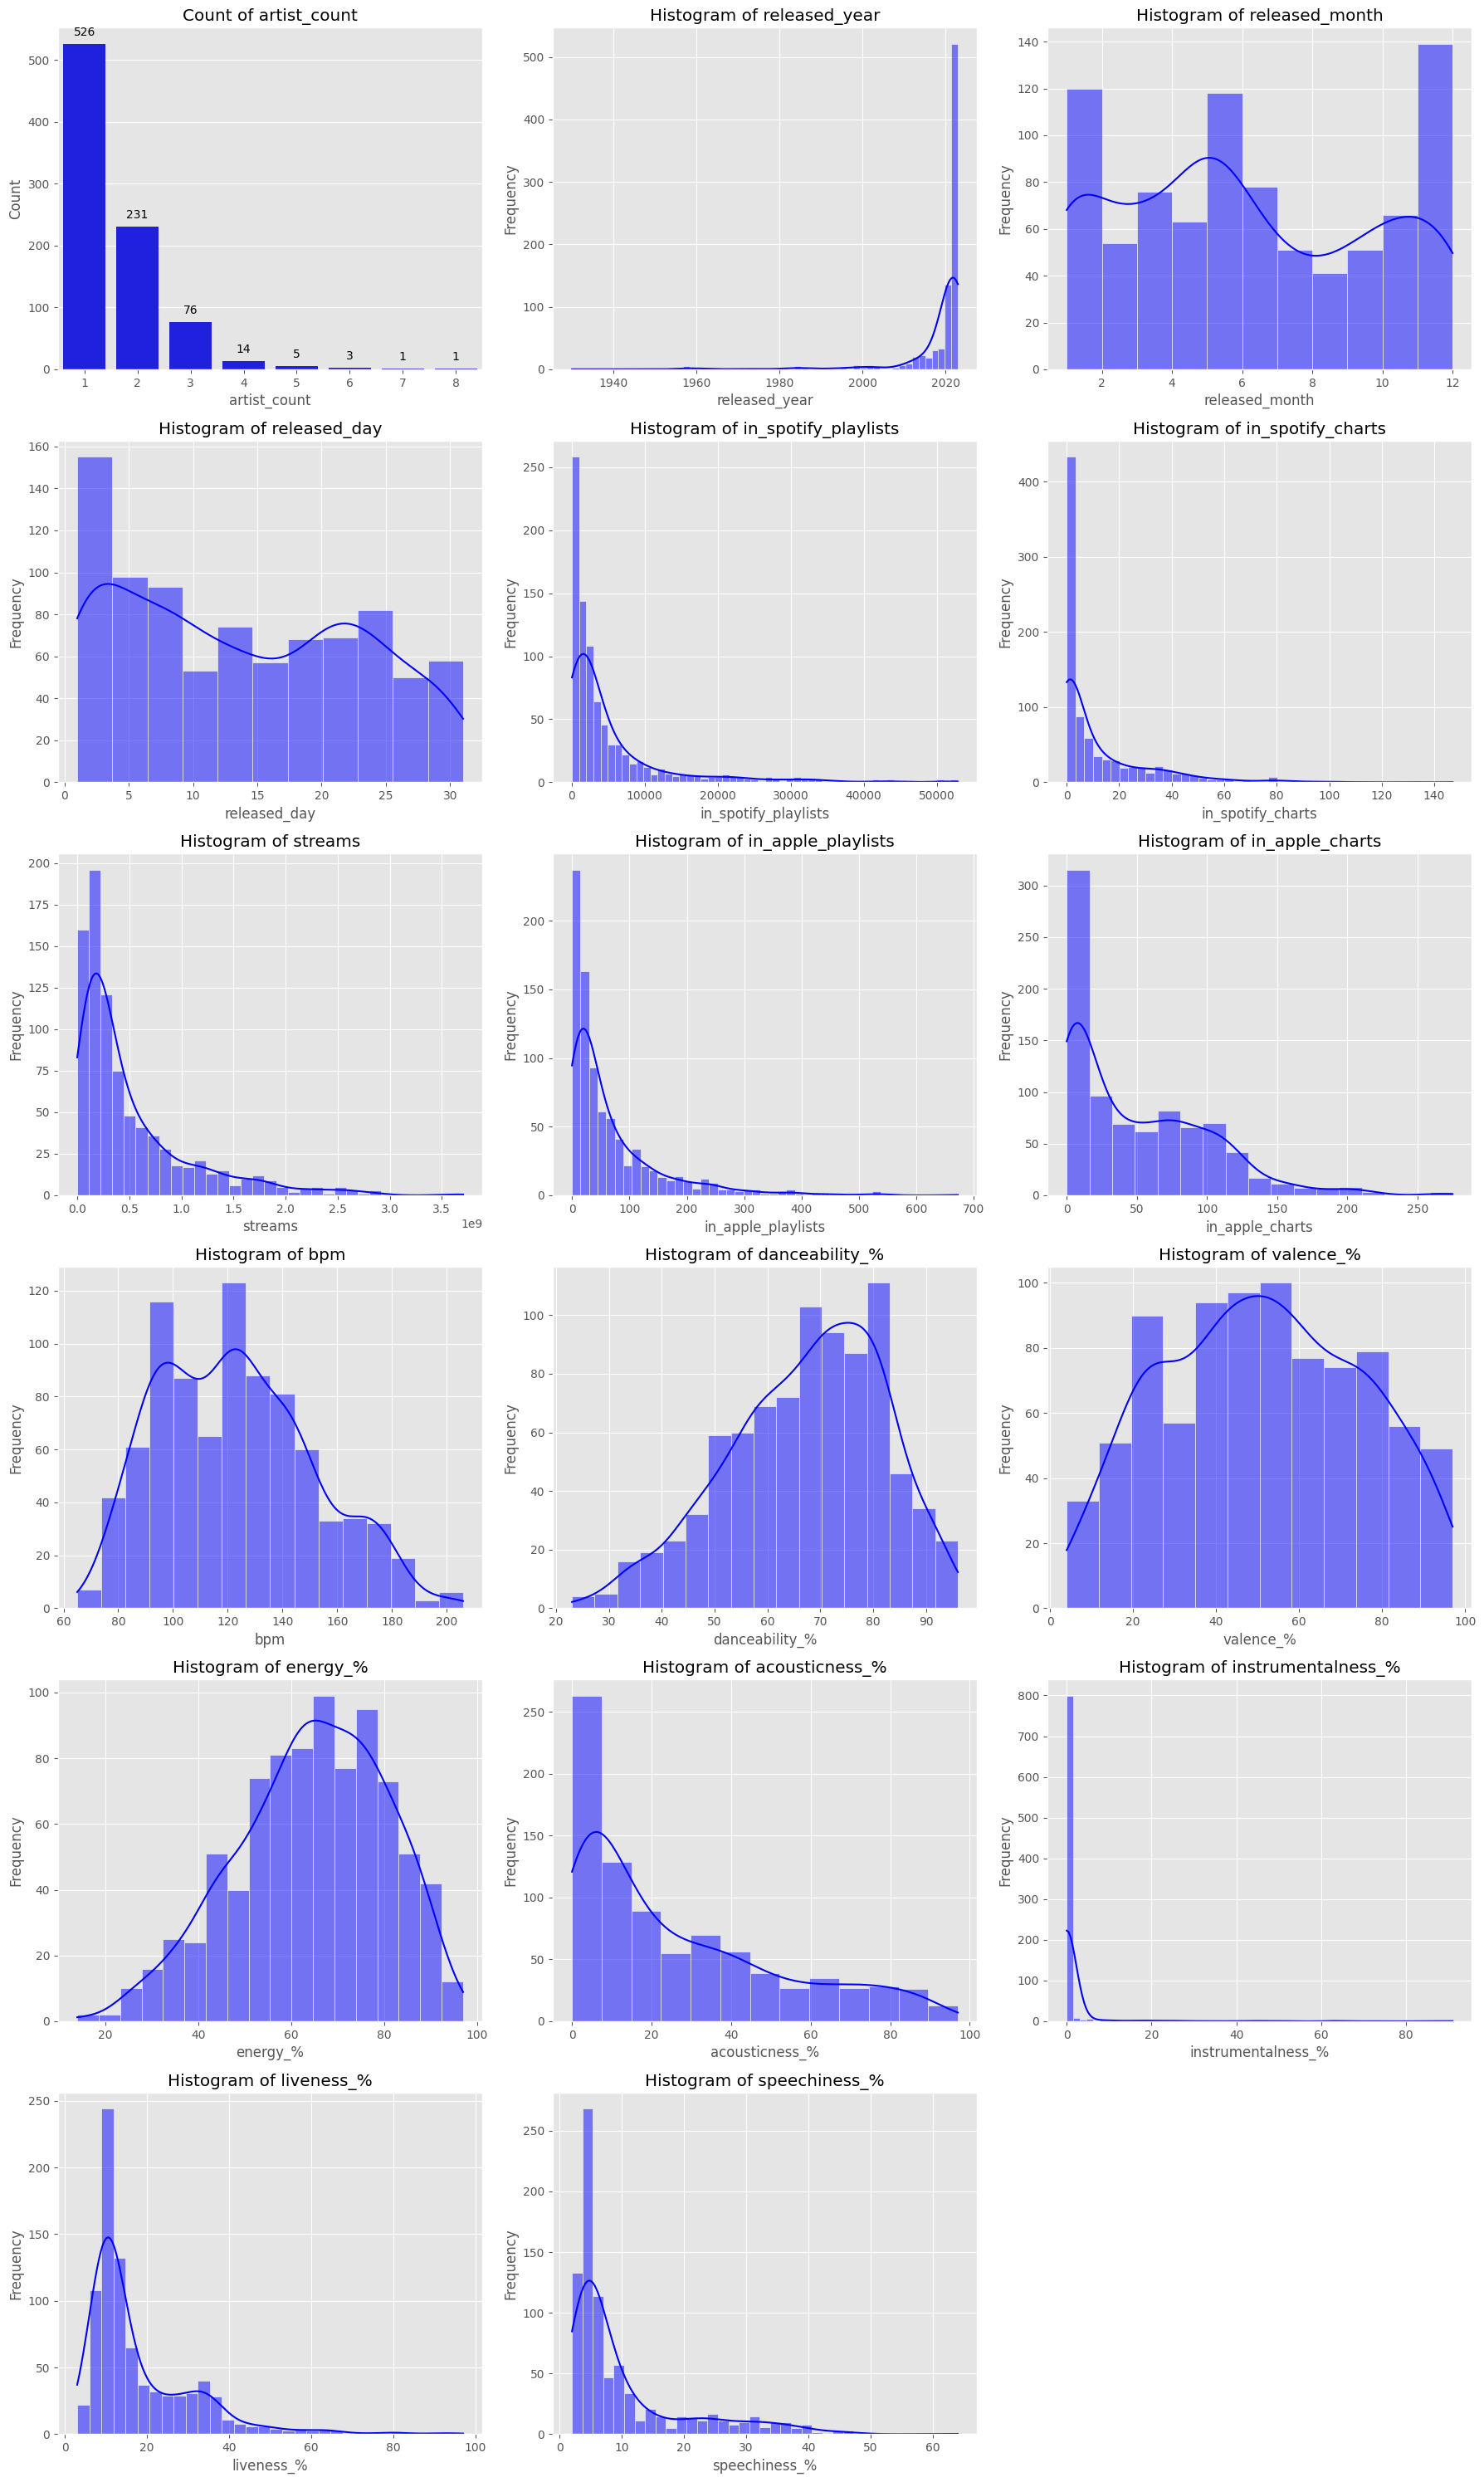

In [566]:

numerical_columns = df.select_dtypes("int64").columns

num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # Compute number of rows needed for 3 columns per row

# Create figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    
    if df[column].nunique() > 10:  # Continuous variable (>10 unique values)
        sns.histplot(df[column], color="blue", kde=True, ax=ax) #kde=True -> plot an approximate probability density function
        ax.set_title(f"Histogram of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
    else:  # Discrete variable (<10 unique values)
        sns.countplot(x=column, data=df, color="blue", ax=ax)
        ax.set_title(f"Count of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")

        # Add value labels on bars
        for p in ax.patches:
            ax.annotate(format(p.get_height(), ".0f"),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="bottom",
                        xytext=(0, 5),
                        textcoords="offset points")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




#### Comments

After analyzing the statistical distribution of the features in the dataset, we draw the following insights about the most streamed songs on Spotify in 2023:

1. **Number of Artists:** Most tracks feature a single artist, although collaborations between two or even three artists are relatively common.

2. **Release Year:** The majority of tracks were released recently, reflecting listeners’ preference for contemporary music that aligns more closely with current tastes and trends.

3. **Release Month:** Songs tend to be released at the beginning of the year, just before summer, or toward the end of the year. Interestingly, there’s a noticeable dip in releases during the summer months—possibly due to users disconnecting during holidays, reducing engagement with new releases.

4. **Release Day:** There's a subtle trend toward releasing songs at the beginning of the month, perhaps to align with playlist updates or marketing cycles.

5. **Musical Attributes:** Popular tracks tend to have slower tempos (lower BPM), are highly danceable and energetic, and exhibit low acousticness and instrumentalness. This suggests a preference for rhythm-driven, vocal-centric music over purely instrumental or acoustic songs.

6. **Valence:** The valence variable, which measures musical positivity, shows a nearly symmetrical distribution around 50%. This indicates a balanced preference—listeners enjoy both upbeat and moodier tracks in similar measure.

7. **Liveness:** Presence of live performance elements is common in the most streamed tracks. Users may enjoy the immersive feel of live-sounding tracks.


## Correlation analysis

**Objective:** Reveal linear relationships between features.

In [567]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                      artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  in_apple_charts       bpm  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
artist_count              1.000000       0.076616        0.032990     -0.011917             -0.100919          -0.020673 -0.131273           -0.055404        -0.095824 -0.063419        0.207636   0.117233  0.135091       -0.101232           -0.055208    0.032083       0.131129
released_year             0.076616       1.000000        0.083459      0.171435             -0.387940           0.068413 -0.222450           -0.196616        -0.029040 -0.010362        0.200100  -0.055269  0.097239       -0.150987           -0.020374   -0.011370       0.134253
released_month            0.032990       0.083459        1.000000      0.068443             -0.109876          -0.037911 -0.026944           -0.010285        -0.01790

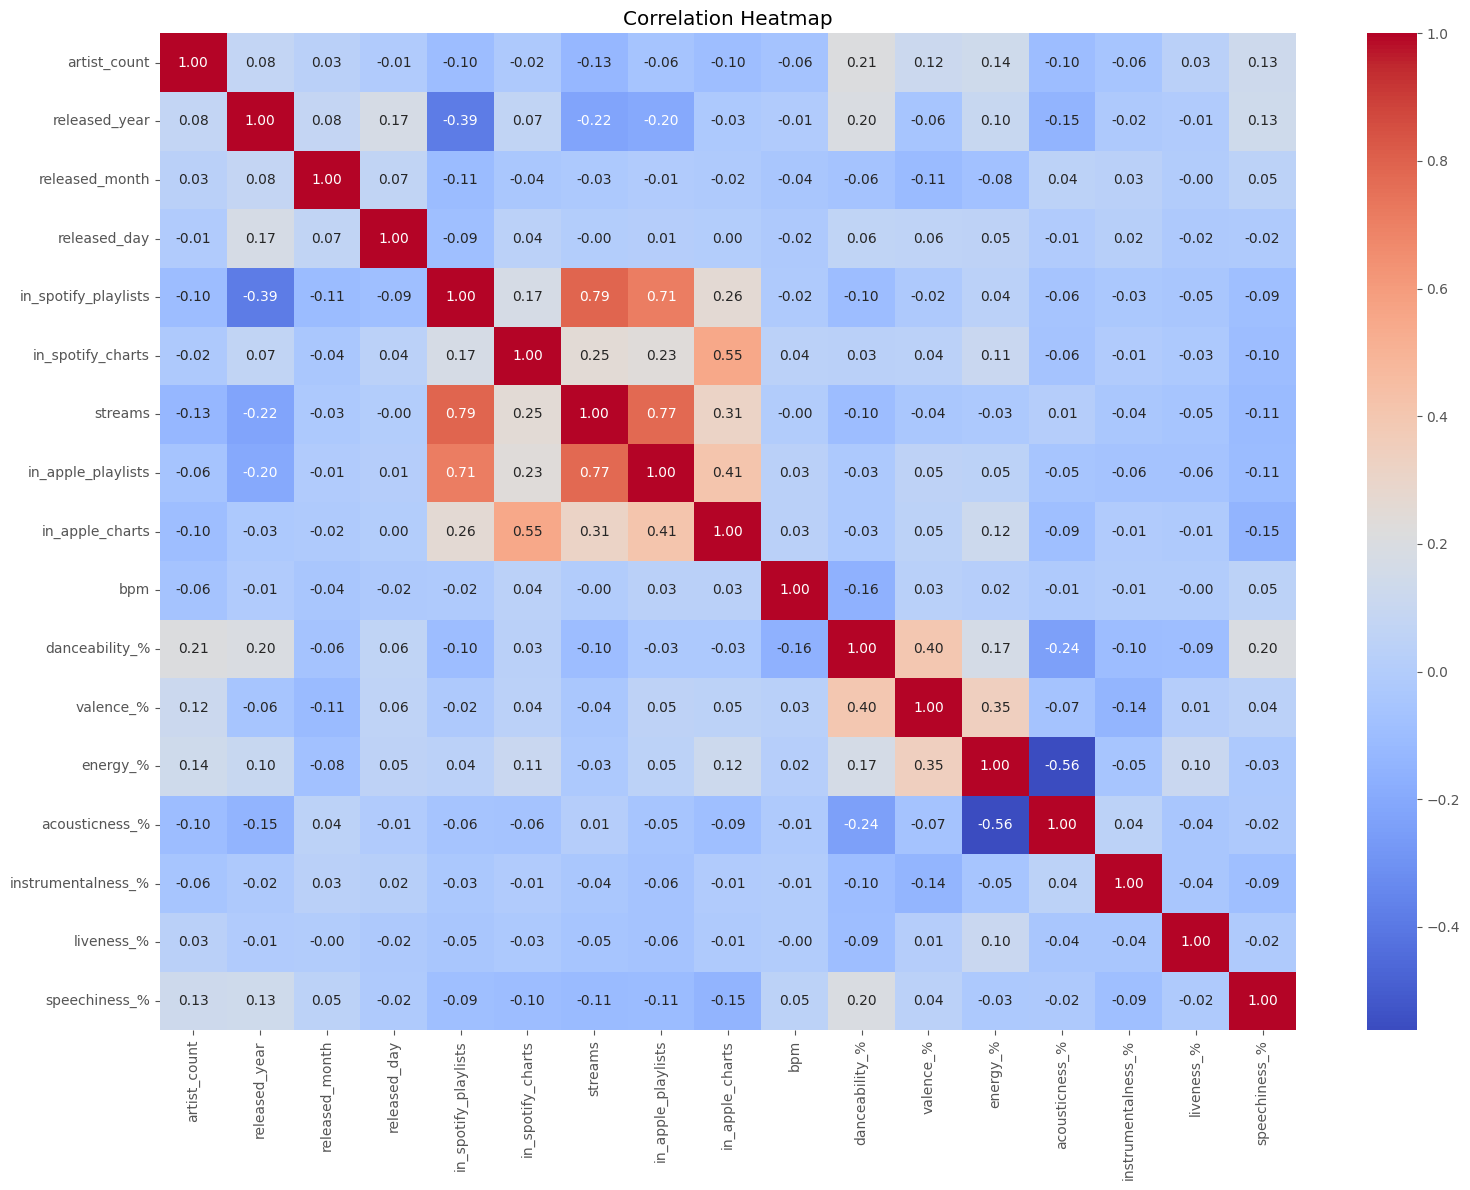

Maximum pairwise correlation: 0.79


In [568]:
#A more visual representation with a heat map

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,
            annot = True, #Annotate numerical value in each cell
            cmap="coolwarm", #chosen color gradient (blue=negative, white=zero, red=positive)
            fmt=".2f") #formats numerical values to 2 decimal places in the annotations

plt.title("Correlation Heatmap")
plt.tight_layout() #Adjust plot layout to avoid title/label overlap
plt.show()

# Find the max correlation
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)) #This is a very compact way of selecting only the upper triangular part of the correlation matrix, which is the only thing that matters.
                                                                                                          # Remember: correlation is symmetrical, and the self-correlation is always 1.
                                                                                                          # What we are doing is creating an upper triangular matrix of "True" values (excluding the diagonal)
                                                                                                          # Using the .where(...) we are effectively selecting these same positions from the correlation matrix.
max_correlation = upper_triangular.max().max() #We have to use .max() twice because using it once returns the max value for each column of the correlation matrix. We want a single value.
print(f"Maximum pairwise correlation: {max_correlation:.2f}")


#### Comments

1. The feature "streams", shows a strong positive correlation with "in_spotify_playlists" and "in_apple_playlists".

2. A weaker, yet noticeable, correlation is also observed with "in_spotify_charts" and "in_apple_charts".

3. These correlations are expected: tracks added to playlists are more likely to be streamed, and appearing in charts increases a track’s exposure to users.

4. Additionally, some weaker — but meaningful — (anti)correlations with "streams" are found in features such as "released_year", "danceability_%", and "speechiness_%". These trends are also reasonable: streaming platform audiences tend to be younger and are often more engaged with recent music. Danceable tracks tend to be catchier and more frequently streamed, while highly instrumental or speechy tracks (e.g. rap) may appeal to a narrower audience.

**Note:** Correlation analysis is a valuable tool for identifying linear relationships between features. However, it's important to keep two key limitations in mind:

1. Correlation may miss nonlinear relationships — features with low correlation coefficients might still be meaningfully related in a nonlinear way.

2. Correlation does not imply causation — just because two variables move together does not mean that one causes the other. For example, there is a strong correlation between the number of ice creams sold and the number of people who go swimming. But this doesn't mean that buying ice cream causes people to swim, or vice versa. Instead, both are influenced by a third common factor: hot weather.


## Multivariate analysis

**Section objective:** Explore dependencies between numerical features beyond linear relationships to reveal patterns in the dataset.

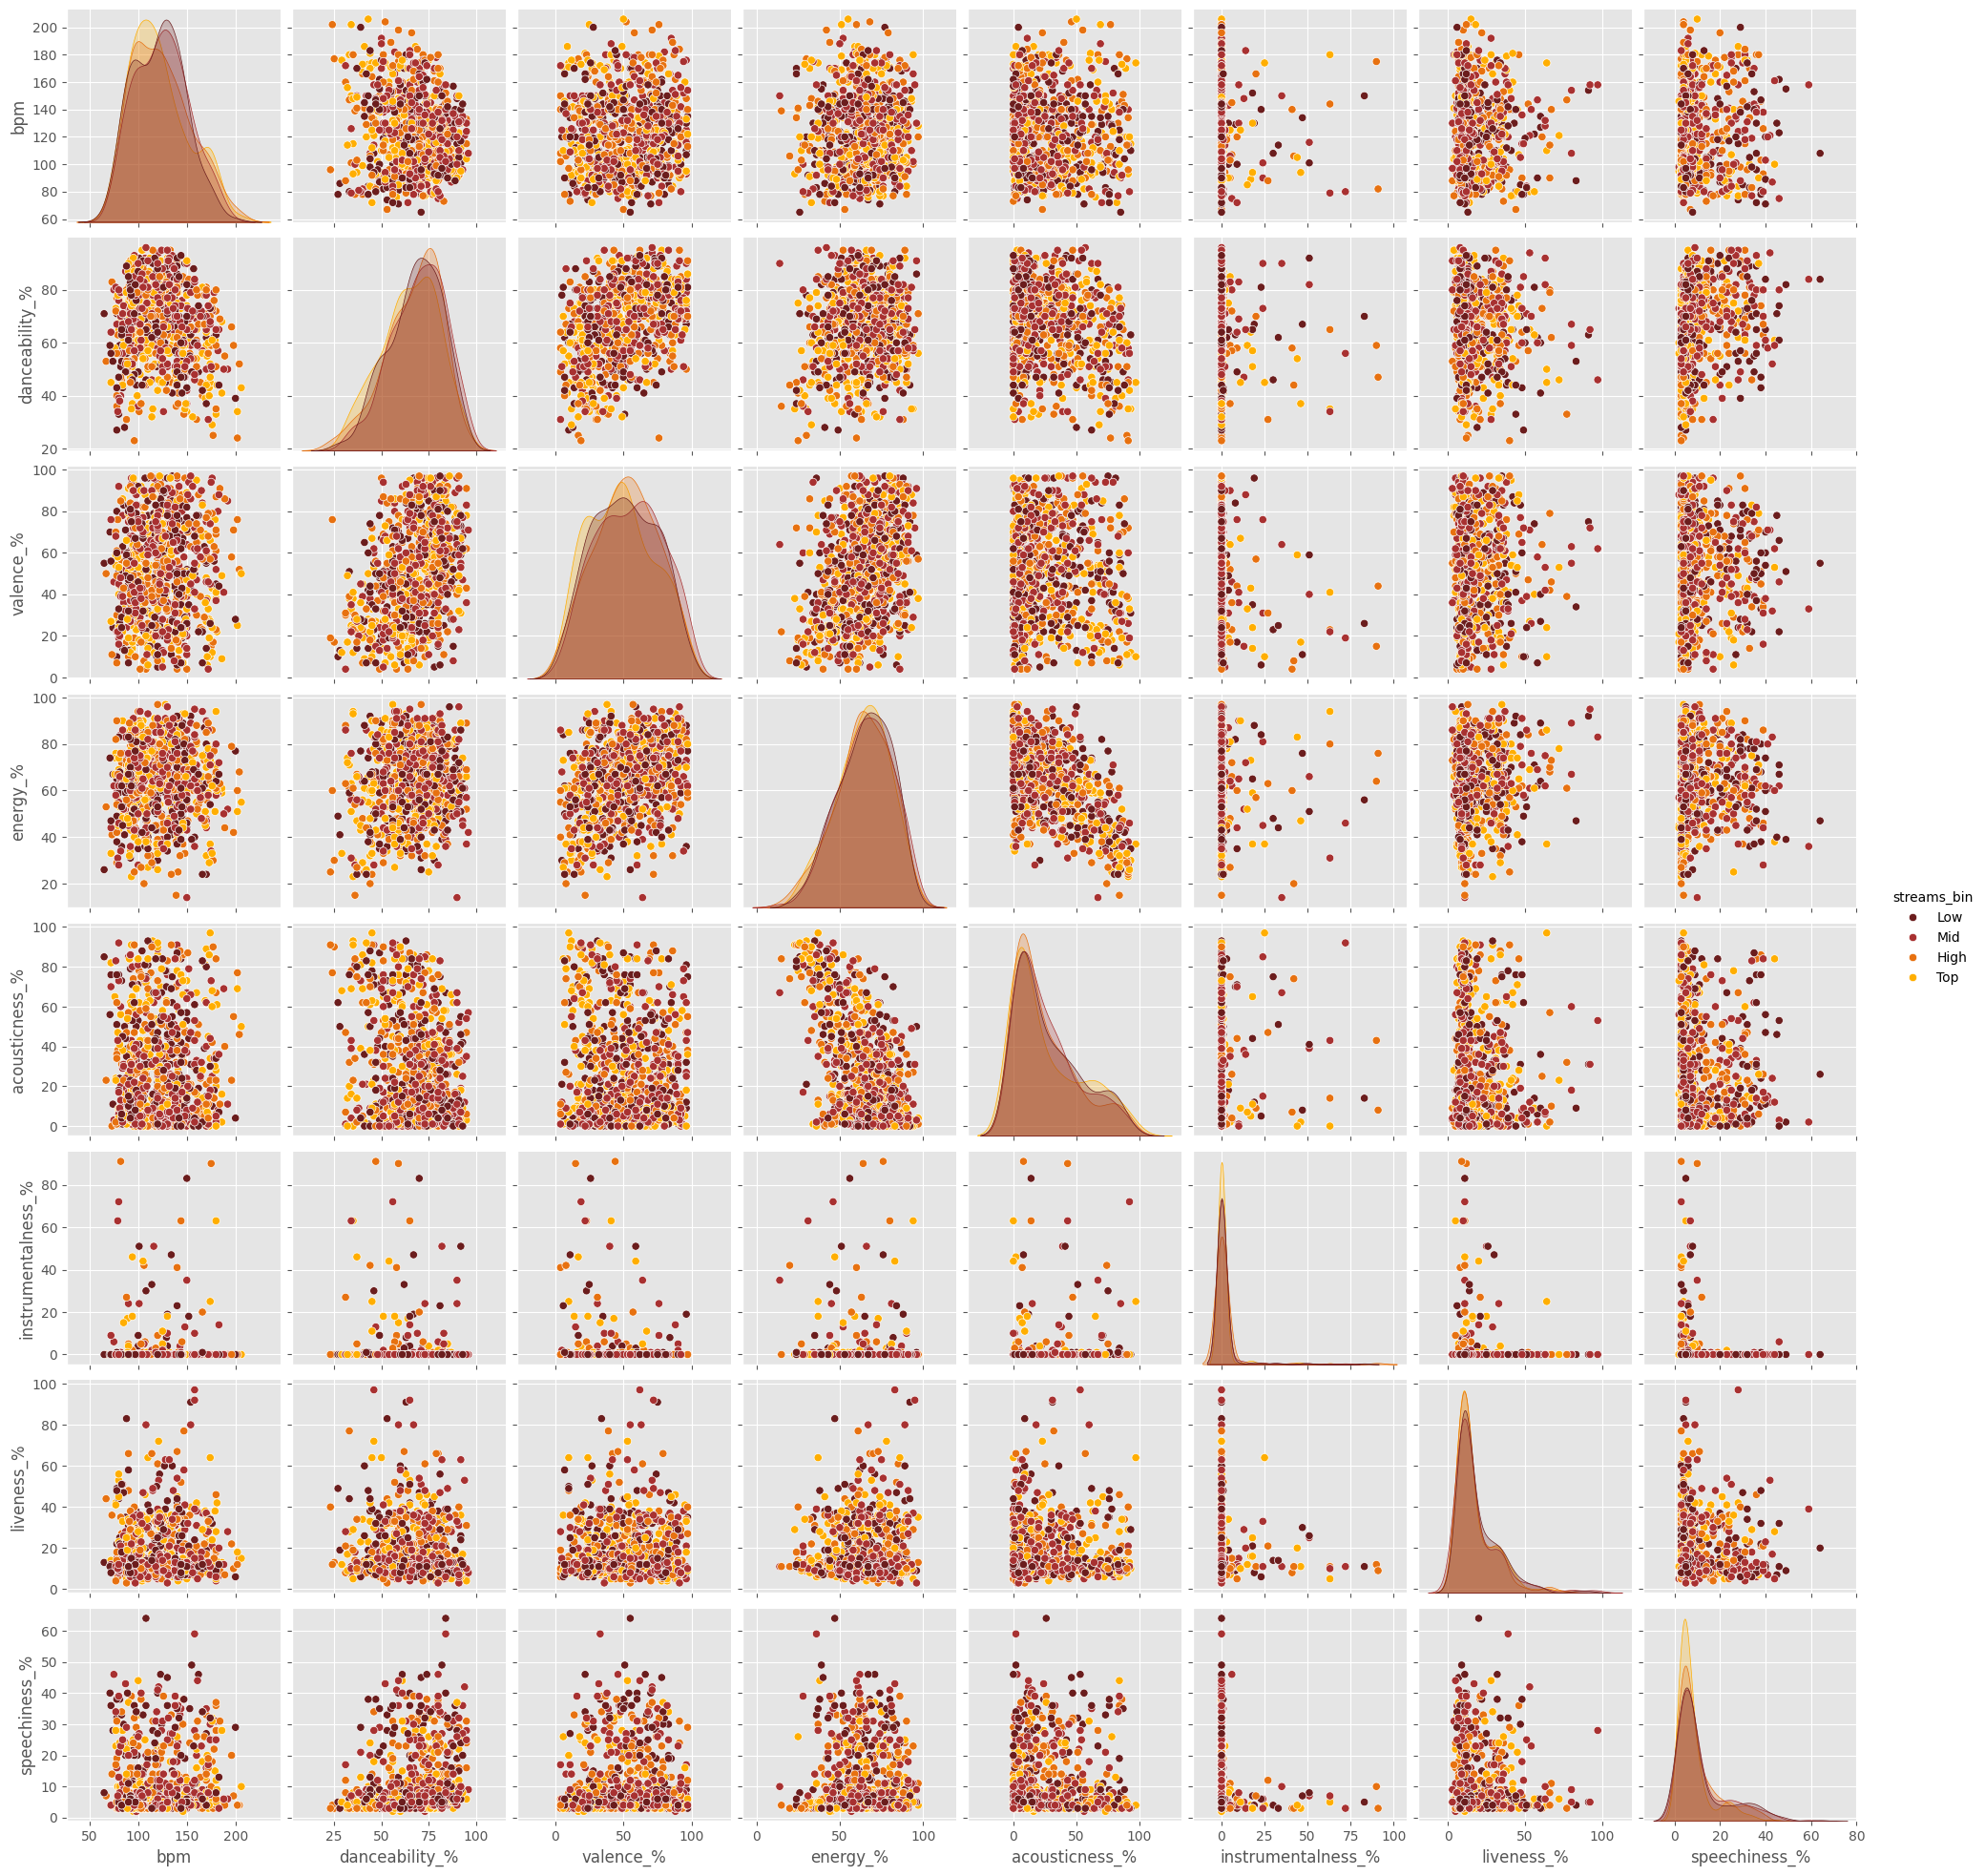

In [569]:
#Exploring pairs of musical features vs success (streams)
df["streams_bin"] = pd.qcut(df["streams"], q=4, labels=["Low", "Mid", "High", "Top"])
palette = {
    "Low": "#6b1d1d",   # blue
    "Mid": "#a83131",   # green
    "High": "#e77110",  # orange
    "Top": "#ffae00",   # red
}

sns.pairplot(data=df,
             vars=["bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%"],
             hue="streams_bin",
             palette=palette)

plt.show()

No clear patterns/dependencies are revealed with these plots.

### Note

At first glance, the variable "streams" might seem like the most important metric for assessing a track's success. However, it's essential to consider the following:

1) Release timing matters: Not all tracks were released at the same time. Songs released earlier naturally have more time to accumulate total streams.

2) Artist fame skews visibility: Major artists (Taylor Swift, Ed Sheeran, etc.) benefit from (well-deserved) large fanbases and extensive media coverage. Thus, their exposure is largely a result of their fame, not necessarily the quality of a specific track.

Hence, we will also focus on two additional key metrics: "in_spotify_charts" and "in_spotify_playlists":

- "in_spotify_charts" helps mitigate the release-date bias by reflecting a track's peak popularity, rather than its total accumulated streams.
- "in_spotify_playlists" captures users engagement with a track. If users truly enjoy and connect with a track, they're likely to save it to a playlist. This behavior is driven less by media exposure and more by the track's intrinsic quality.

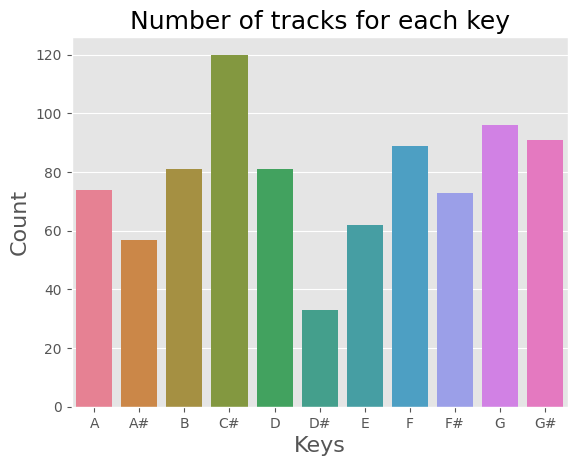

In [570]:
"Analyze categorical feature: key"

sns.countplot(x="key",data=df,hue="key")
plt.xlabel("Keys",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Number of tracks for each key",fontsize=18)
plt.show()

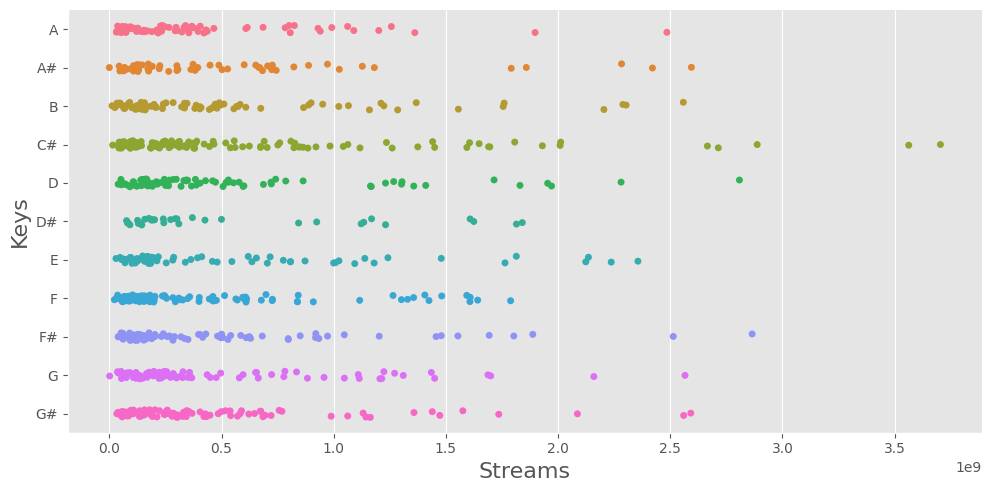

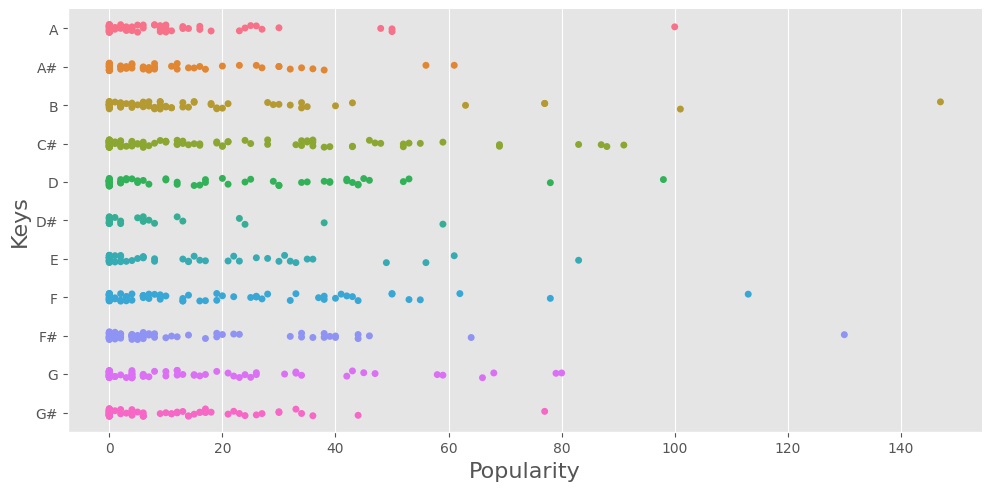

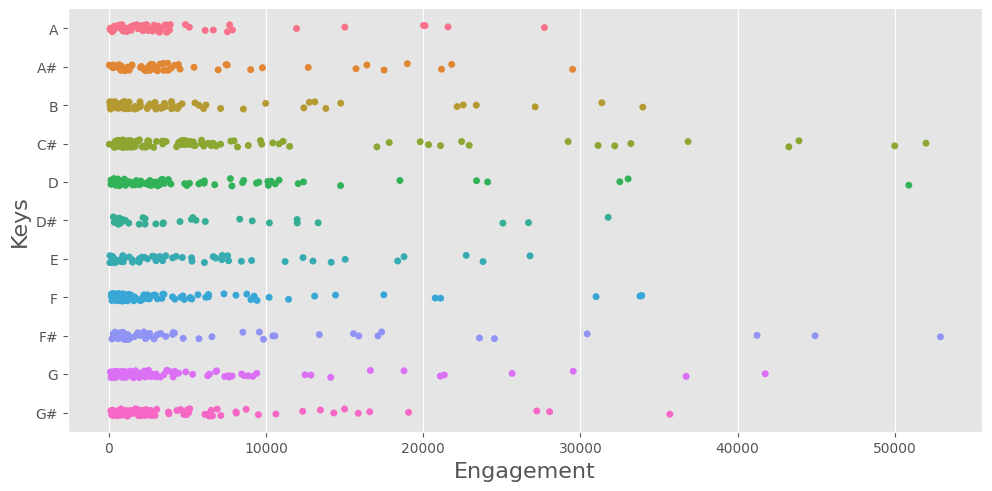

In [571]:
x_vals = ["streams","in_spotify_charts","in_spotify_playlists"]
titles = ["Streams","Popularity","Engagement"]

for i,x in enumerate(x_vals):
    sns.catplot(y="key",
                x=x,
                data=df,
                aspect=2,
                hue="key",
                legend=False)
    plt.xlabel(titles[i], fontsize=16)
    plt.ylabel("Keys",fontsize=16)
plt.show()

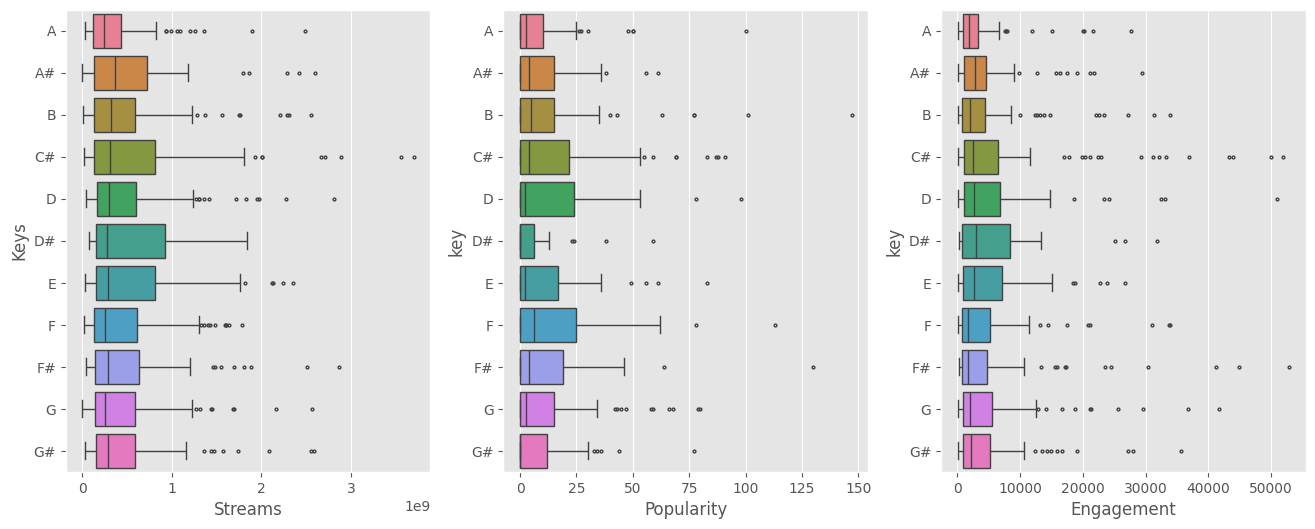

In [572]:
fig, axes = plt.subplots(1,3,figsize=(16,6))

axes = axes.flatten()

sns.boxplot(y="key",
            x="streams",
            data=df,
            hue="key",
            fliersize=2,
            ax=axes[0])
axes[0].set_xlabel("Streams", fontsize=12)
axes[0].set_ylabel("Keys",fontsize=12)

sns.boxplot(y="key",
            x="in_spotify_charts",
            data=df,
            hue="key",
            fliersize=2,
            ax=axes[1])
axes[1].set_xlabel("Popularity", fontsize=12)

sns.boxplot(y="key",
            x="in_spotify_playlists",
            data=df,
            hue="key",
            fliersize=2,
            ax=axes[2])
axes[2].set_xlabel("Engagement", fontsize=12)

plt.show()

### Comments 

- C# is by far the most frequently used key, followed by G, G#, and F. This notable imbalance in key usage likely reflects the popularization of certain tonalities in modern music. As a result, we must be cautions when drawing statistical conclusions, as some keys might be overrepresented.
- An interesting observation is that C# appears frequently among the songs with the highest "total streams" and "engagement". However, when we shift focus to the "popularity" metric, we no longer see as many prominent values. In fact, several songs written in A, B, D, F, and F# have achieved higher popularity than the most popular track in C#. One possible explanation is that, while C# is widely used and therefore it offers a familiar and comfortable sound (translating to better engagement), it may lacknovelty or viral appeal. A similar pattern can be observed with F# and G: relatively high engagement and total streams, but reduced popularity.
- The keys with the least overall success are D# and E.

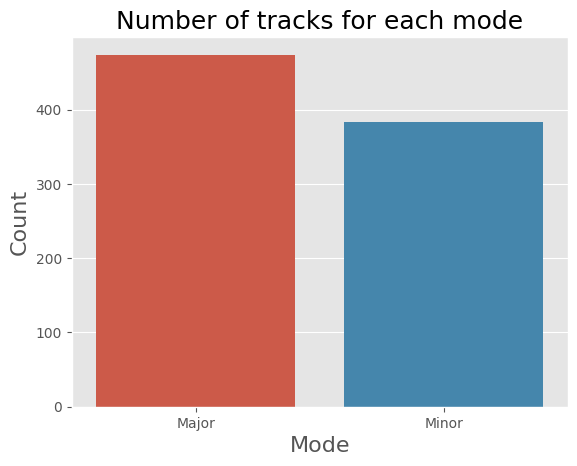

In [573]:
"Analyze categorical feature: mode"

sns.countplot(x="mode",data=df,hue="mode")
plt.xlabel("Mode",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Number of tracks for each mode",fontsize=18)
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_5460\3483730756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="mode",


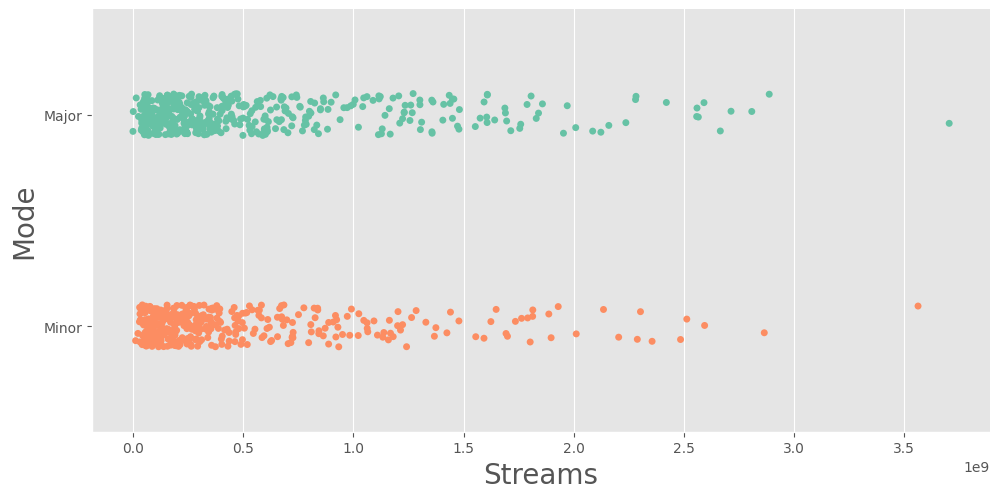

In [574]:
palette = sns.color_palette("Set2", len(df["mode"].unique()))

sns.catplot(y="mode",
            x="streams",
            data=df,
            aspect=2,
            palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Mode",fontsize=20)
plt.show()

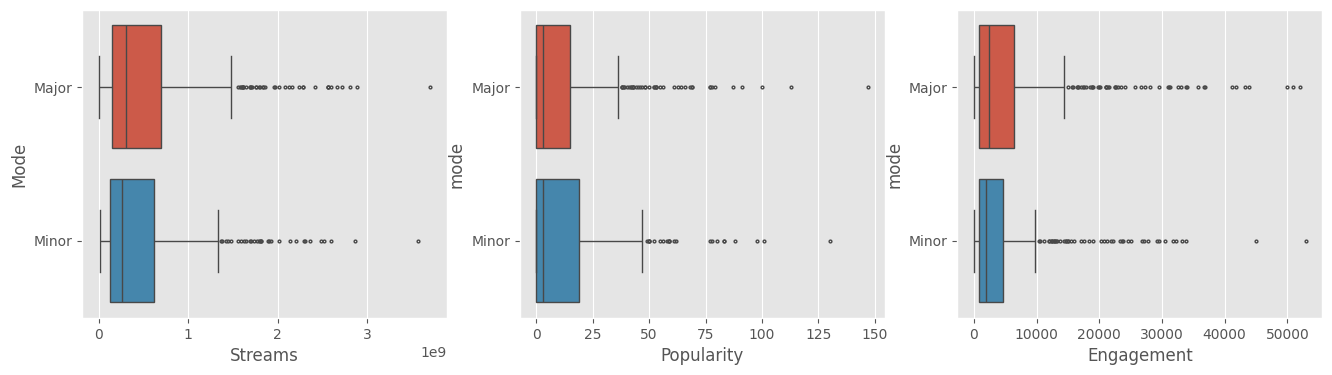

In [575]:
fig, axes = plt.subplots(1,3,figsize=(16,4))

axes = axes.flatten()

sns.boxplot(y="mode",
            x="streams",
            data=df,
            hue="mode",
            fliersize=2,
            ax=axes[0])
axes[0].set_xlabel("Streams", fontsize=12)
axes[0].set_ylabel("Mode",fontsize=12)

sns.boxplot(y="mode",
            x="in_spotify_charts",
            data=df,
            hue="mode",
            fliersize=2,
            ax=axes[1])
axes[1].set_xlabel("Popularity", fontsize=12)

sns.boxplot(y="mode",
            x="in_spotify_playlists",
            data=df,
            hue="mode",
            fliersize=2,
            ax=axes[2])
axes[2].set_xlabel("Engagement", fontsize=12)

plt.show()

### Comments

- The major mode is significantly more common in the dataset. Major keys are typically associated with Pop music, while minor modes are more often found in Rock. Given Pop's current dominance, this imbalance is expected. Unfortunately, we cannot visually confirm this genre-based distribution, as the dataset lacks the "genre" feature.
- In terms of overall performance (popularity, engagement, and total streams), both modes exhibit similar behavior.

## Top tracks analysis

The tracks in this dataset are all highly successful. So far, we have explored the characteristics of this group of a 857 top tracks. In this section, we take it a step further, and examine the most elite songs: what is takes not just to be successful, but to produce a true hit in today's extremely competitive music market.


In [576]:
tops = [5,10,25,50,75,100]
labels = ["Top 5", "Top 10", "Top 25", "Top 50", "Top 75", "Top 100"]

def analyze_top(metric, feature, numerical=True):
    """ Function for visualizing features grouped by success metrics.
        Args:
            metric (str): success metric.
            feature (str): feature to visualize.
            numerical (bool): feature is numerical (True) or categorical (False)
    """
    if numerical: #Numerical feature: plot data points + mean tendency
        plot_data = []

        for top, label in zip(tops, labels):
            data = df.nlargest(top, metric)

            temp_df = pd.DataFrame({
                "top": [label] * len(data),
                "values": data[feature]
            })
            plot_data.append(temp_df)

        point_df = pd.concat(plot_data, ignore_index=True) #Concatenate df for different "top" values

        plt.figure(figsize=(8, 6))
        sns.stripplot( #Plot data points for each subgroup
            data=point_df,
            x="top",
            y="values",
            color="blue",
            alpha=.25,
            legend=False
        )
        sns.pointplot( #Compute mean for each subgroup + tendency
            data=point_df,
            x="top",
            y="values",
            marker="D",
            markersize=5, 
            linestyle="--",
            errorbar=None,
            color="blue"            
        )

        plt.title(f"Mean of {feature} across Top Tracks by {metric}")
        plt.ylabel(f"{feature}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        

    else: #Categorical feature
        plot_data = []

        for top in tops:
            data = df.nlargest(top, metric)
            top_5 = data[feature].value_counts().head(5) #Extract top 5 most ocurring categories
            top_5_relative = {k: v / top * 100 for k, v in top_5.items()} #Compute relative frequency
            plot_data.append(top_5_relative) #Plot data is now a list of dictionaries

        # Collect all top categories
        all_categories = set() #Creating a set ensures that categories aren't repeated
        for d in plot_data:
            all_categories.update(d.keys())
        all_categories = list(all_categories)

        # Create frequency matrix
        freq_matrix = []
        for d in plot_data:
            row = [d.get(cat, 0) for cat in all_categories]
            freq_matrix.append(row) #Each row of freq_matrix contains the relative frequencies for a fixed "top" value in (5,10,25,etc.)
                                    #each column represents the relative frequencies of a fixed "category" across all "top" values

        freq_df = pd.DataFrame(freq_matrix, columns=all_categories, index=labels)

        ax = freq_df.plot(kind="bar", figsize=(12, 6), colormap="Set2")
        plt.title(f"{feature} % across Top Tracks by {metric}")
        plt.ylabel("Relative Frequency (%)")
        plt.xticks(rotation=45)
        plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


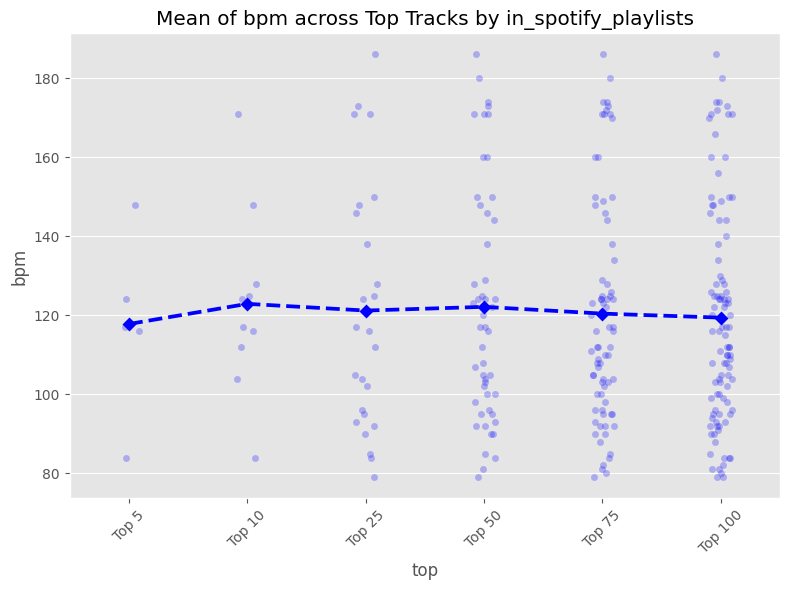

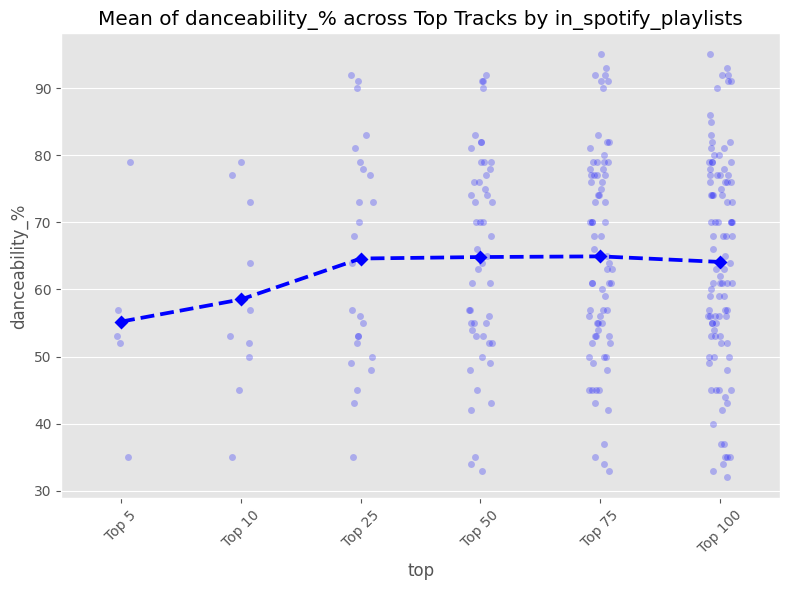

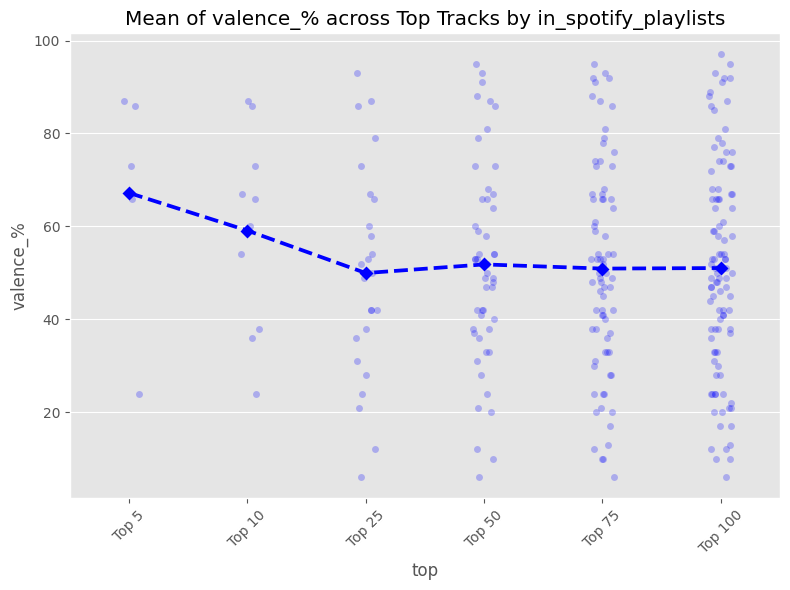

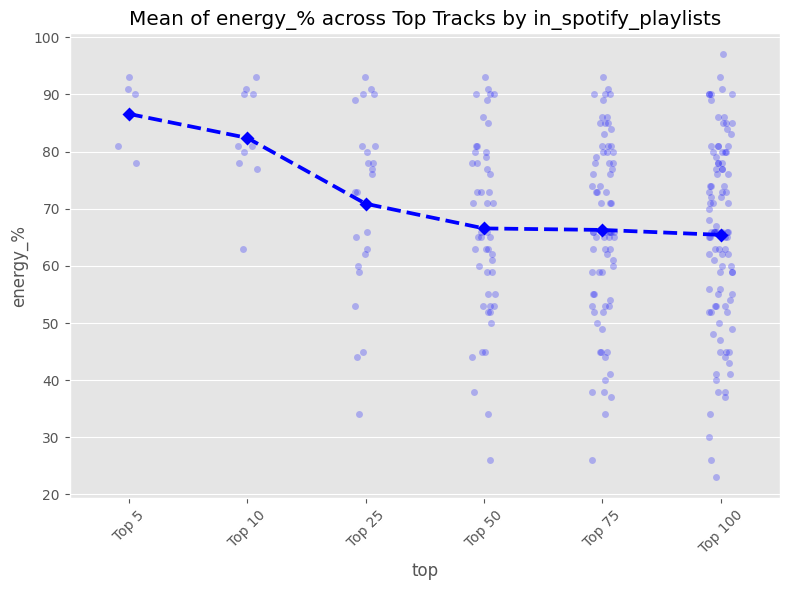

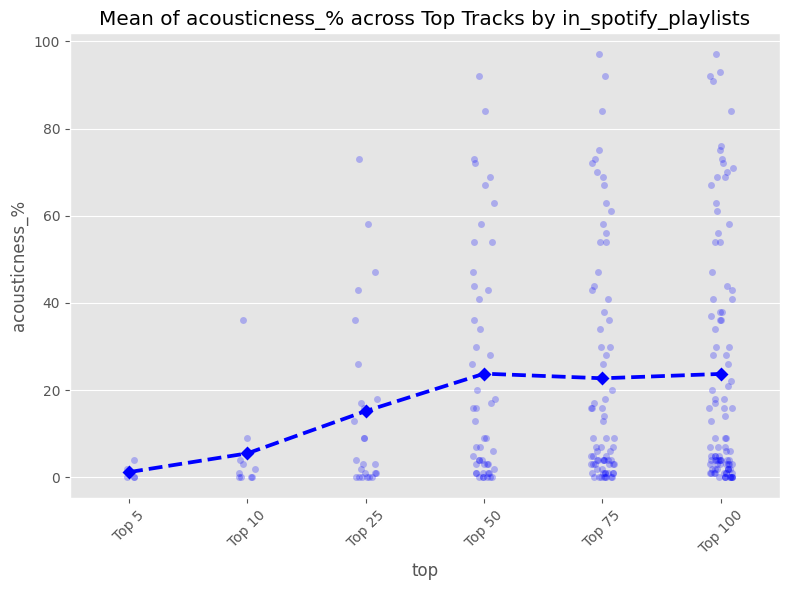

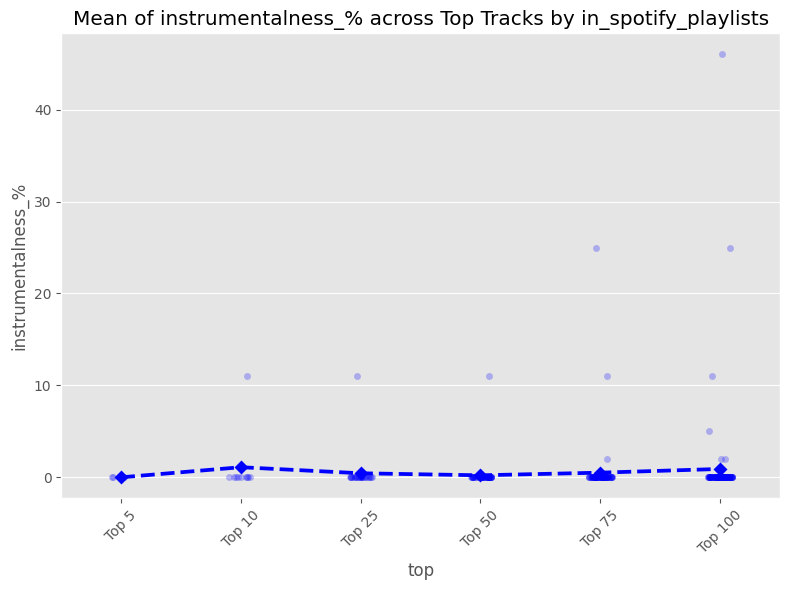

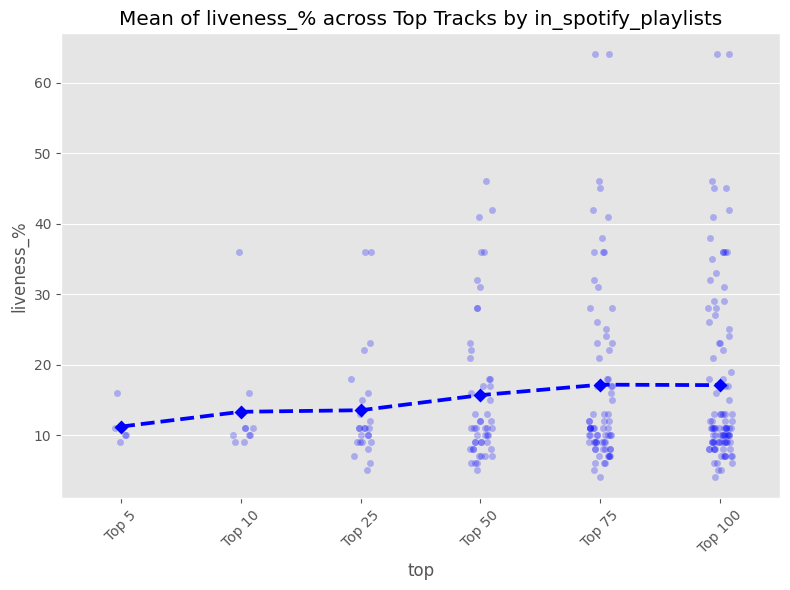

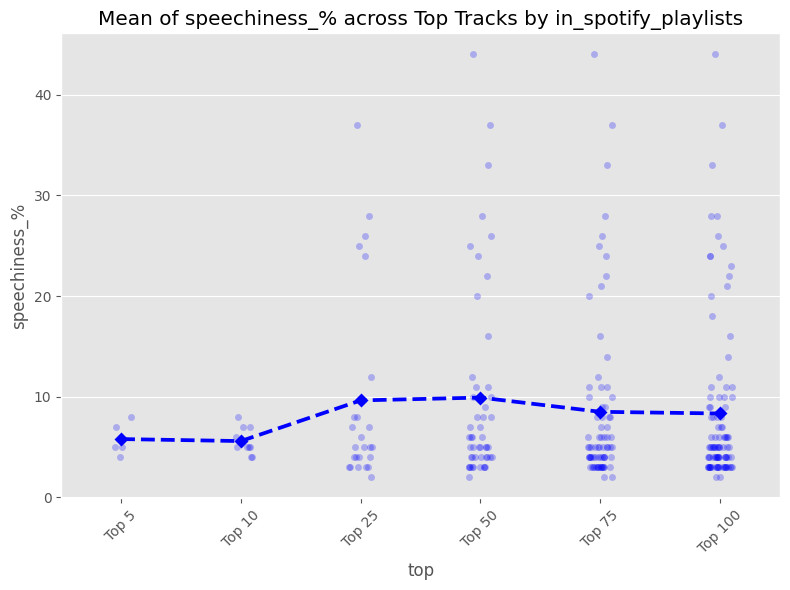

In [577]:
numerical_columns = ["bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%"]
for column in numerical_columns:
    analyze_top("in_spotify_playlists",column,numerical=True)

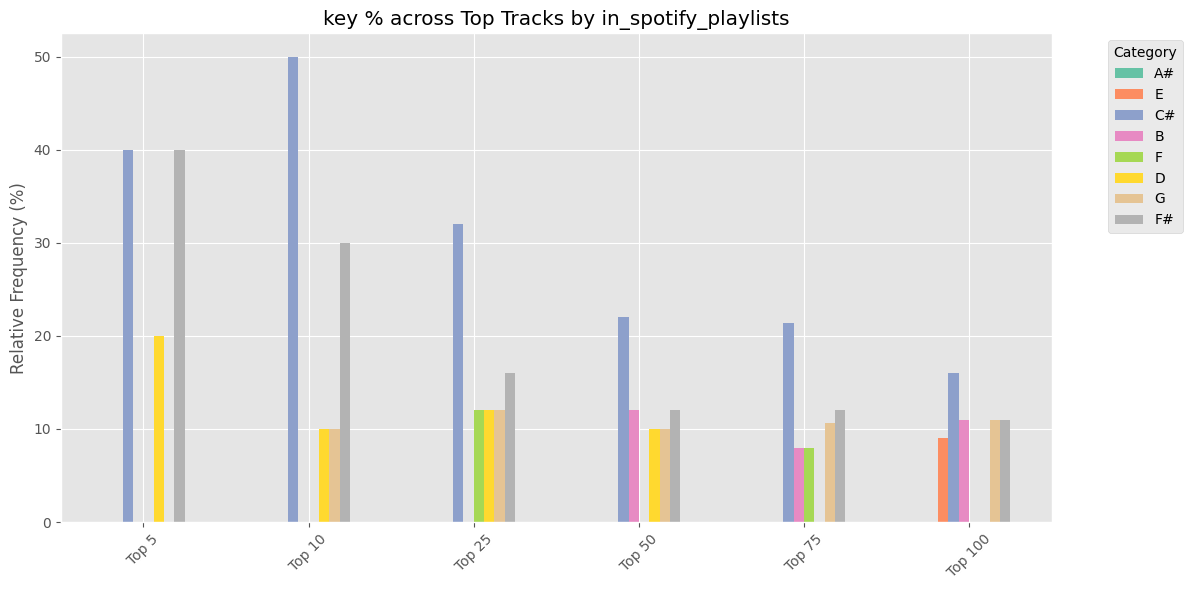

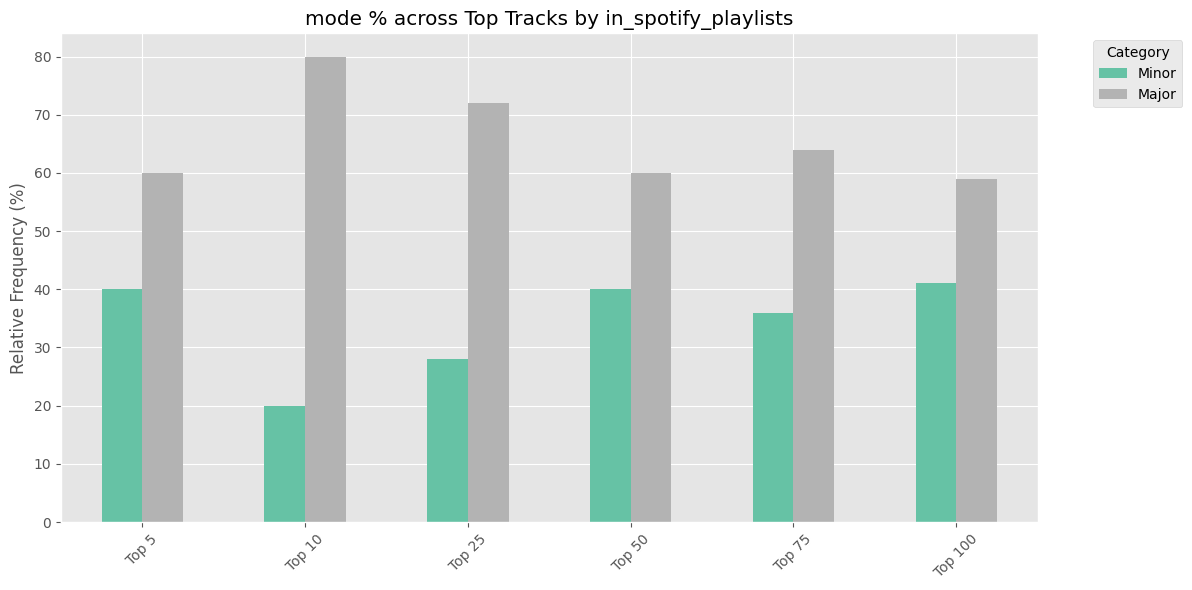

In [578]:
categorical_columns = ["key","mode"]
for column in categorical_columns:
    analyze_top("in_spotify_playlists",column,numerical=False)

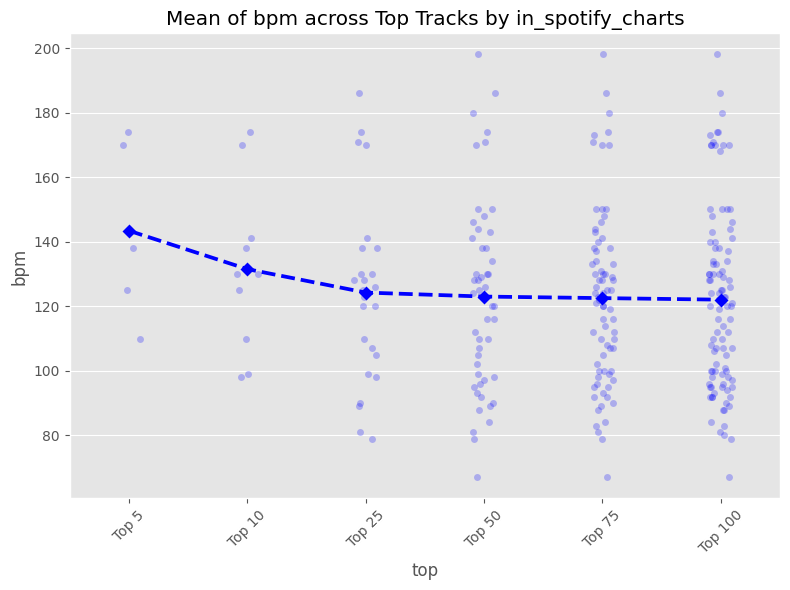

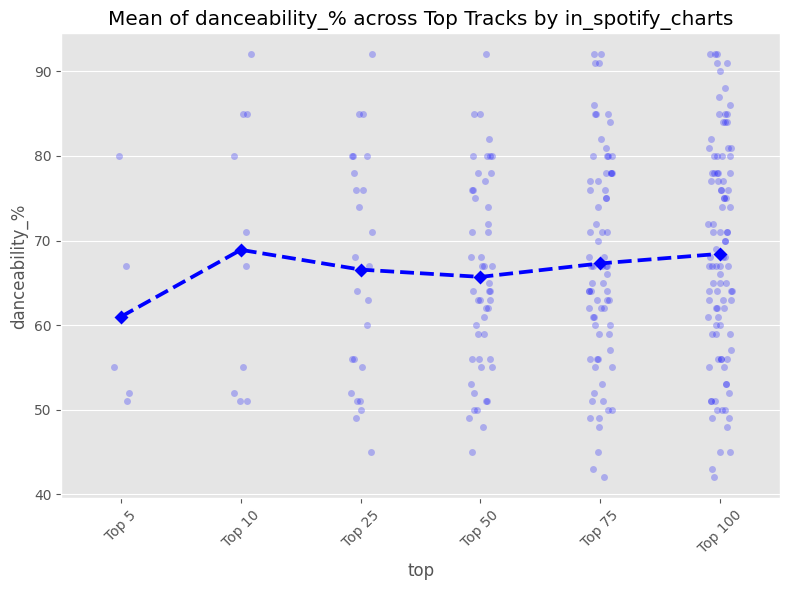

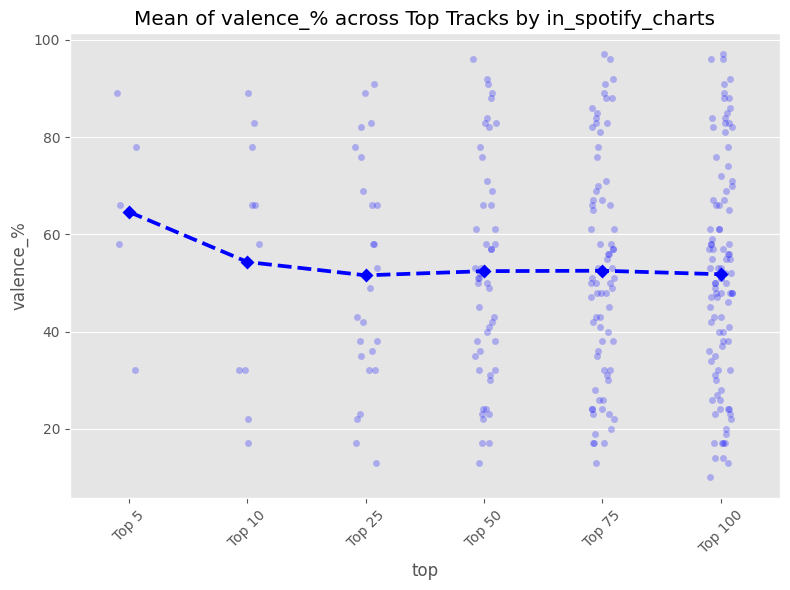

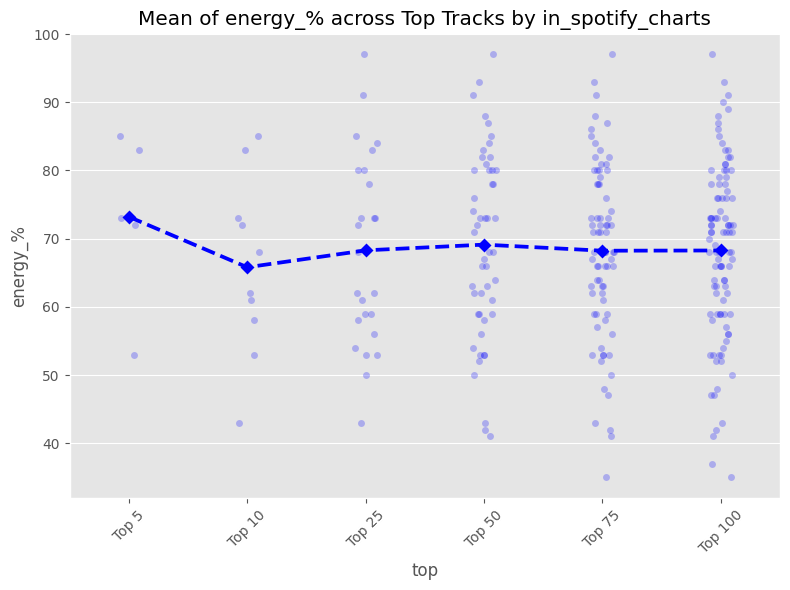

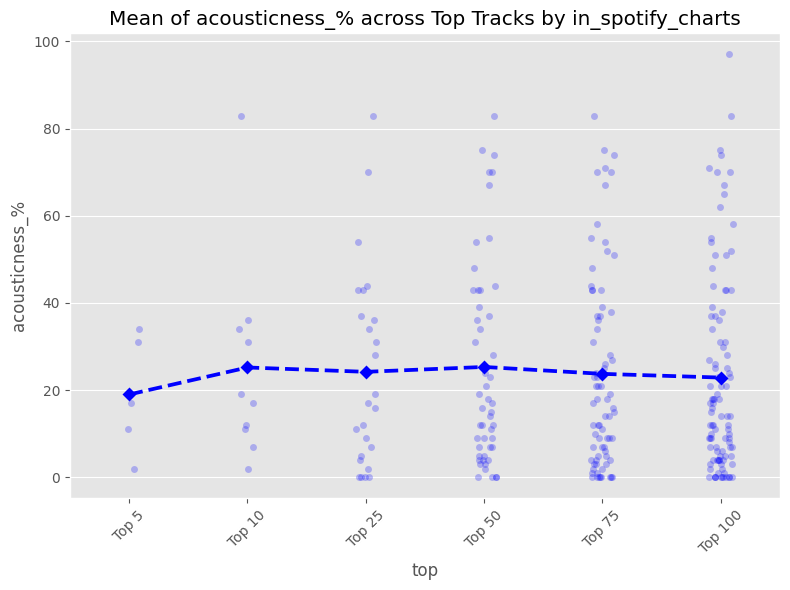

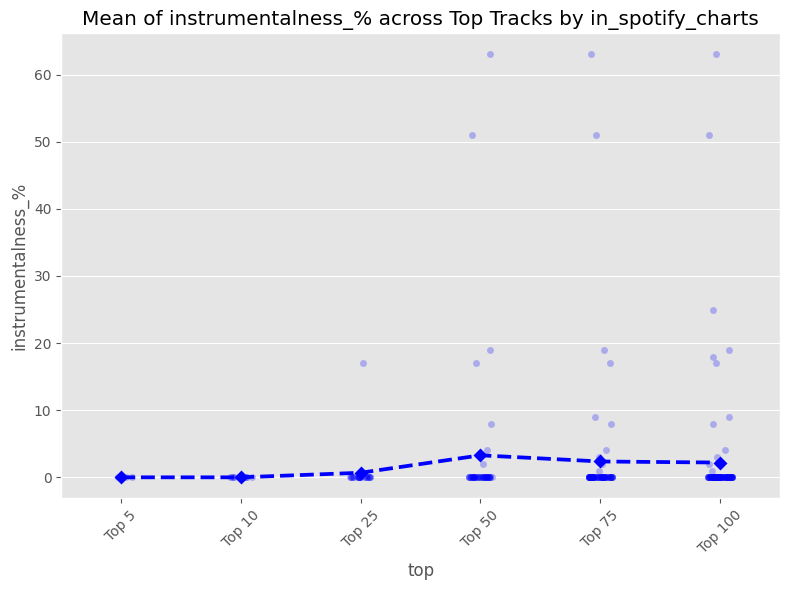

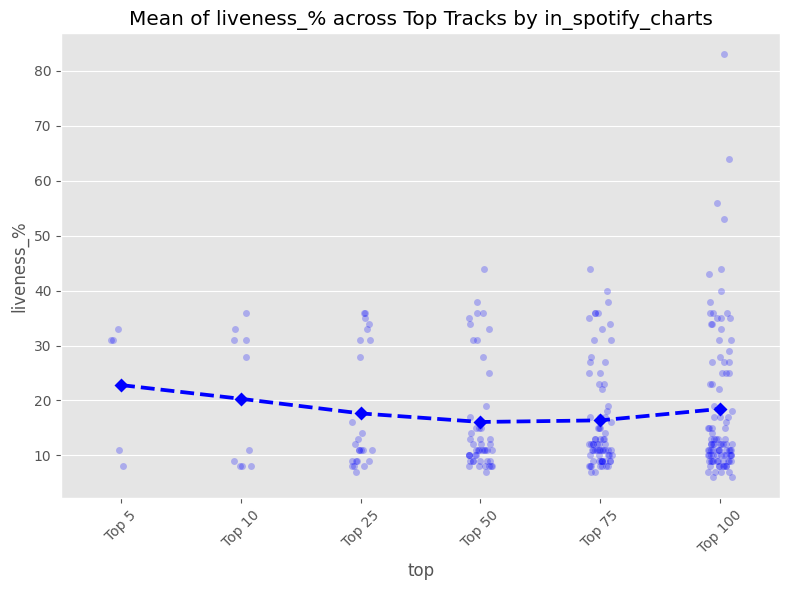

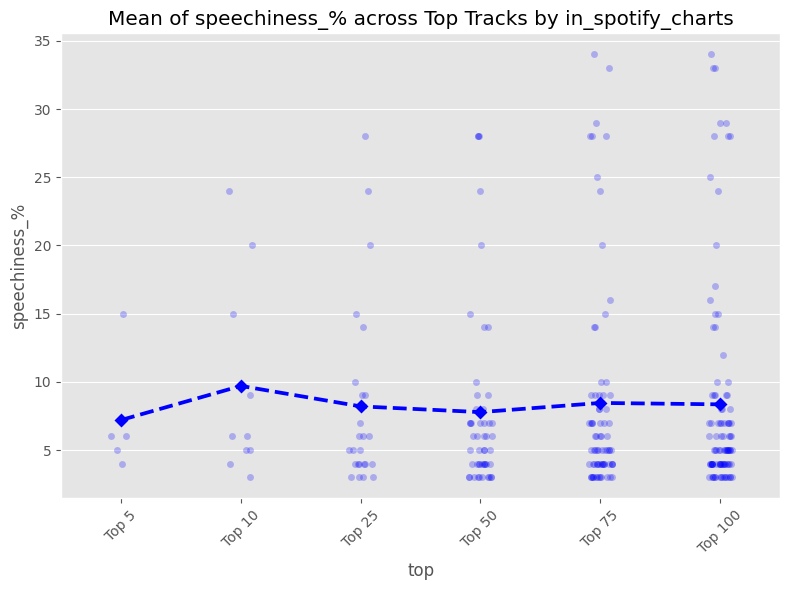

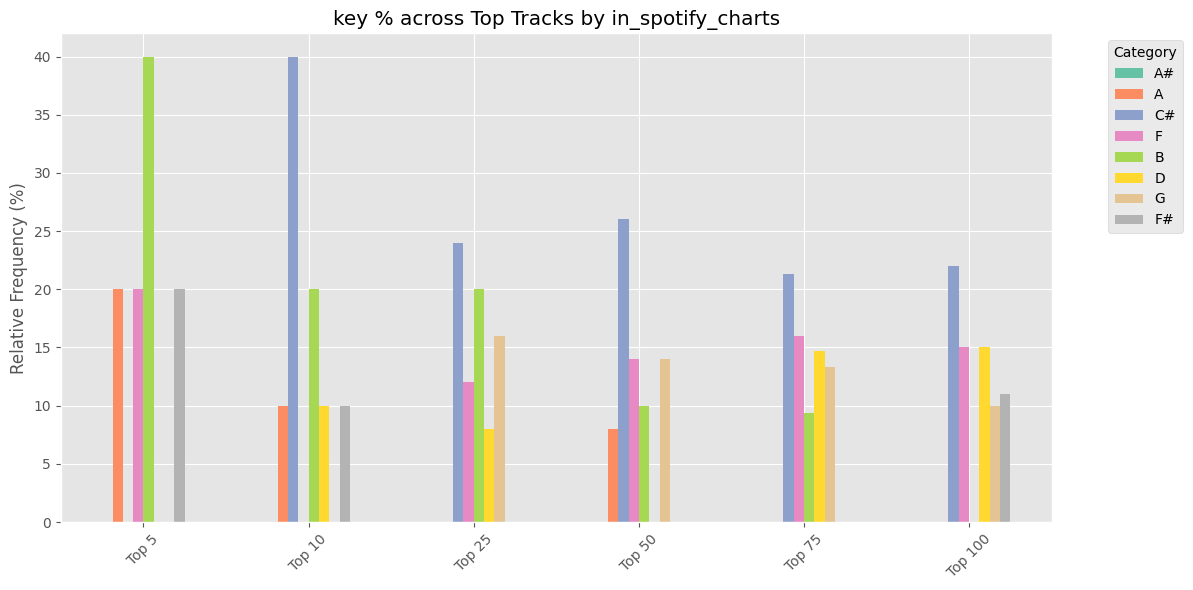

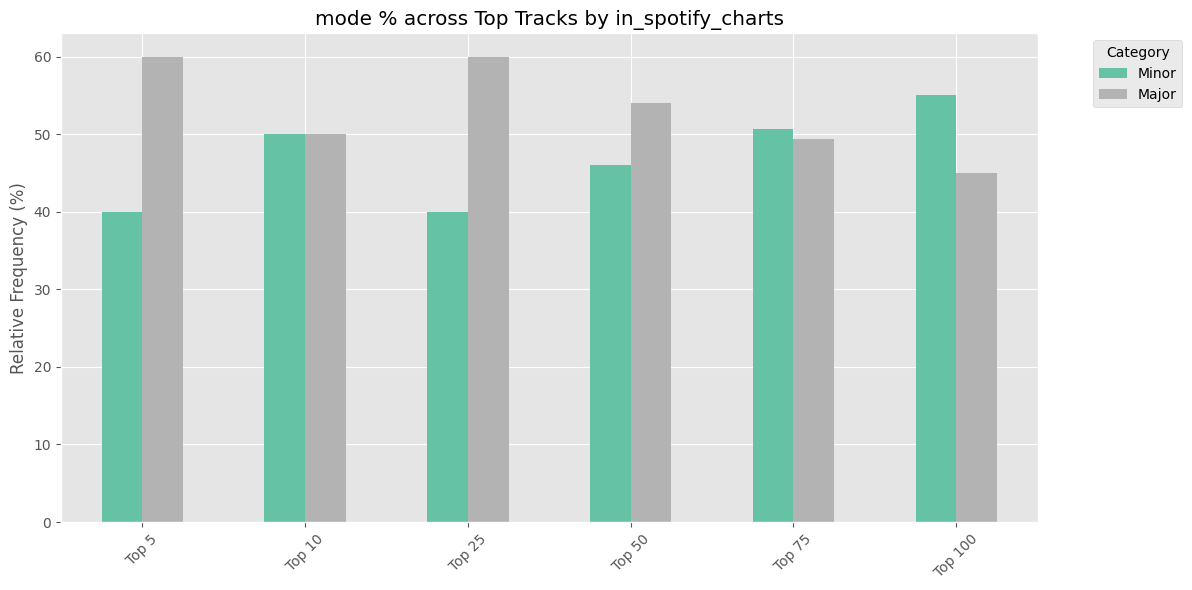

In [579]:
for column in numerical_columns:
    analyze_top("in_spotify_charts",column,numerical=True)
for column in categorical_columns:
    analyze_top("in_spotify_charts",column,numerical=False)


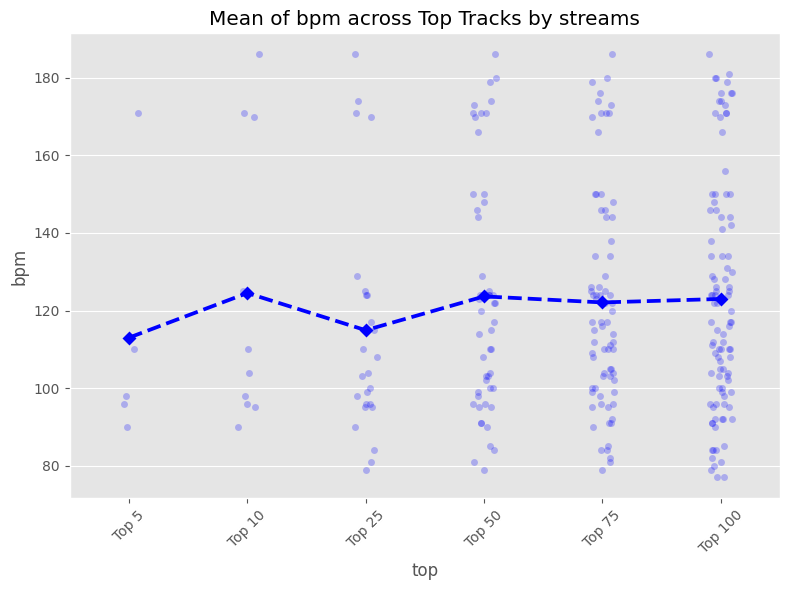

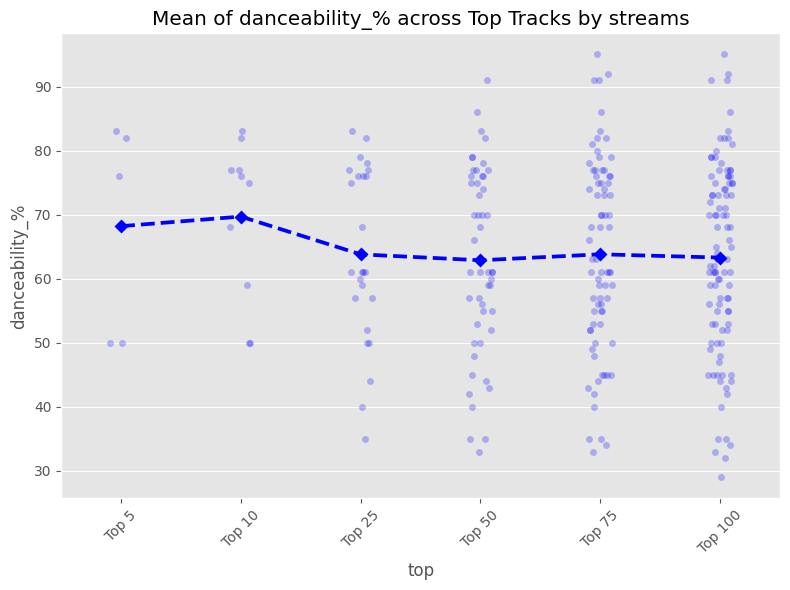

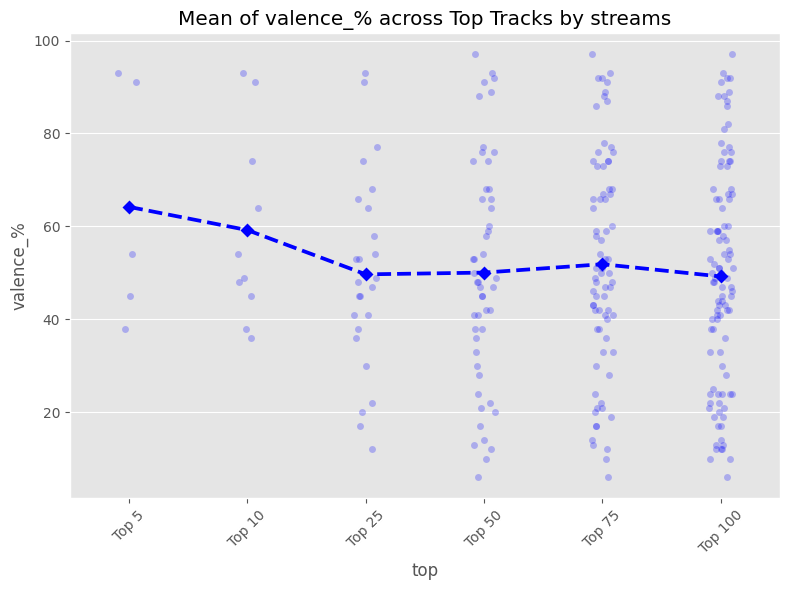

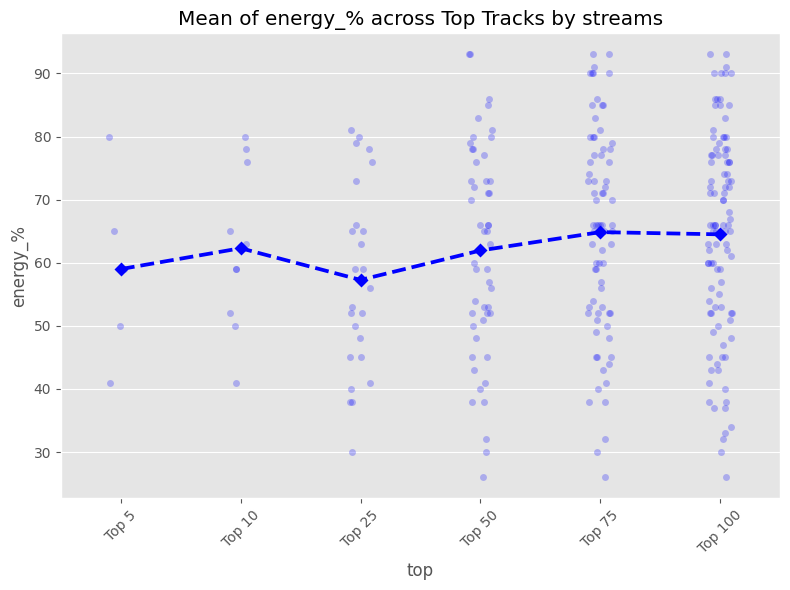

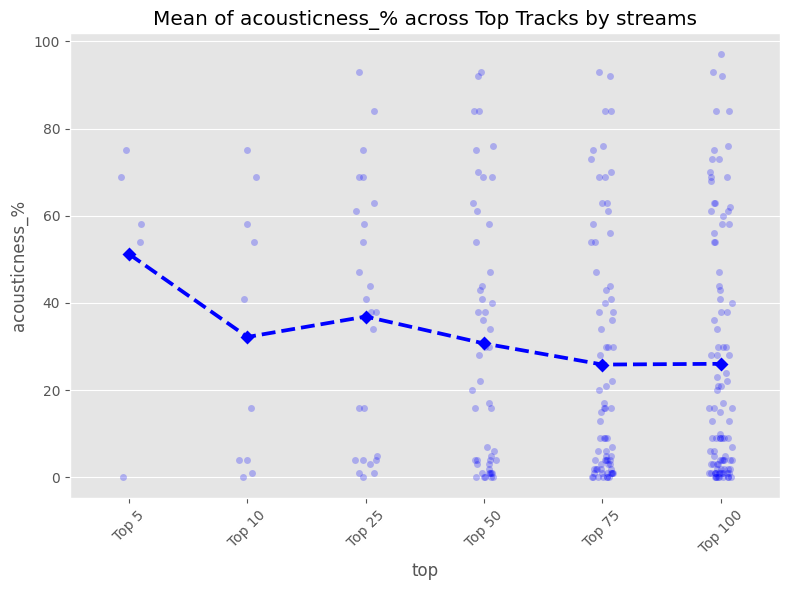

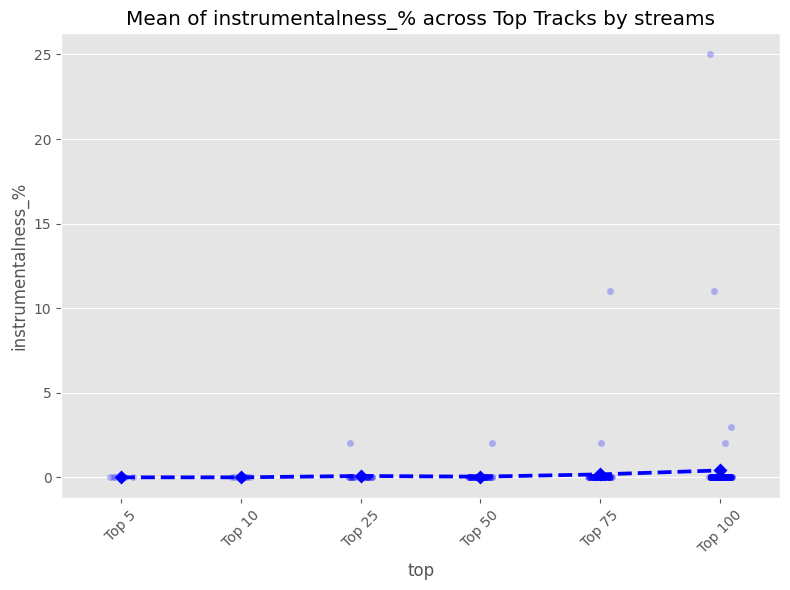

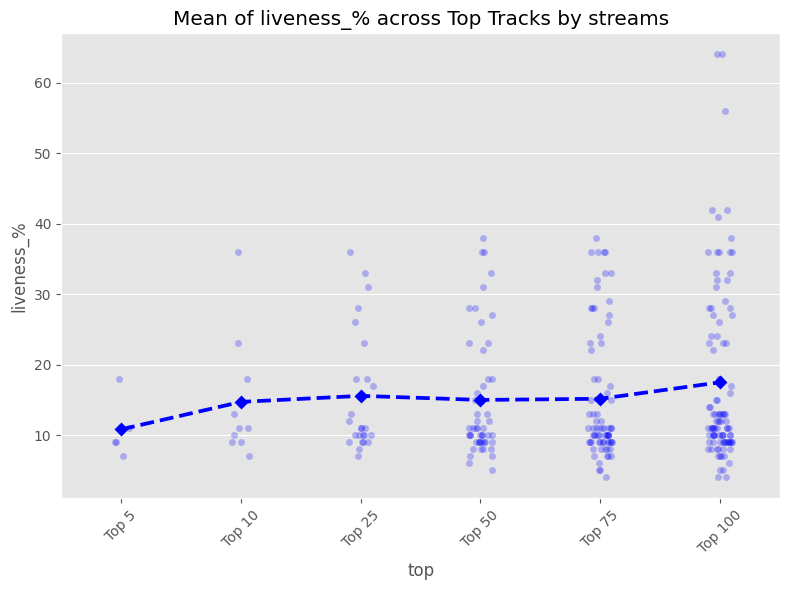

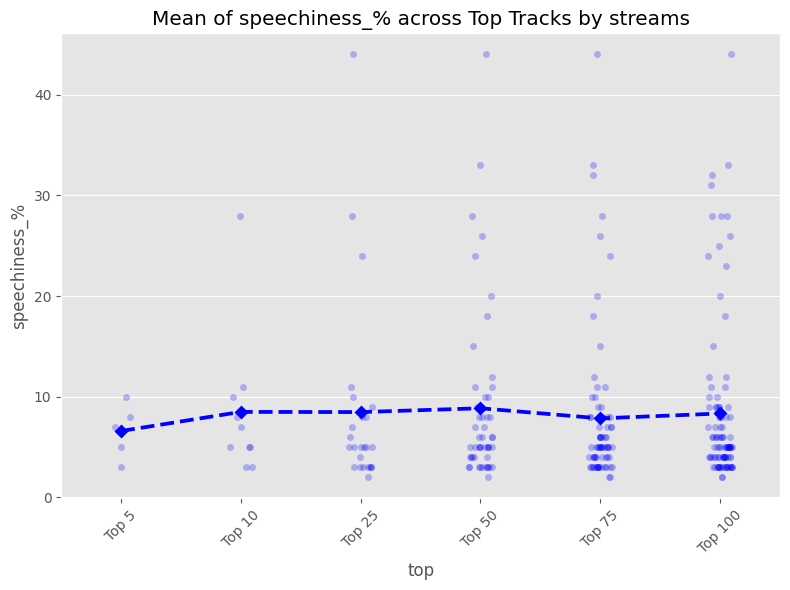

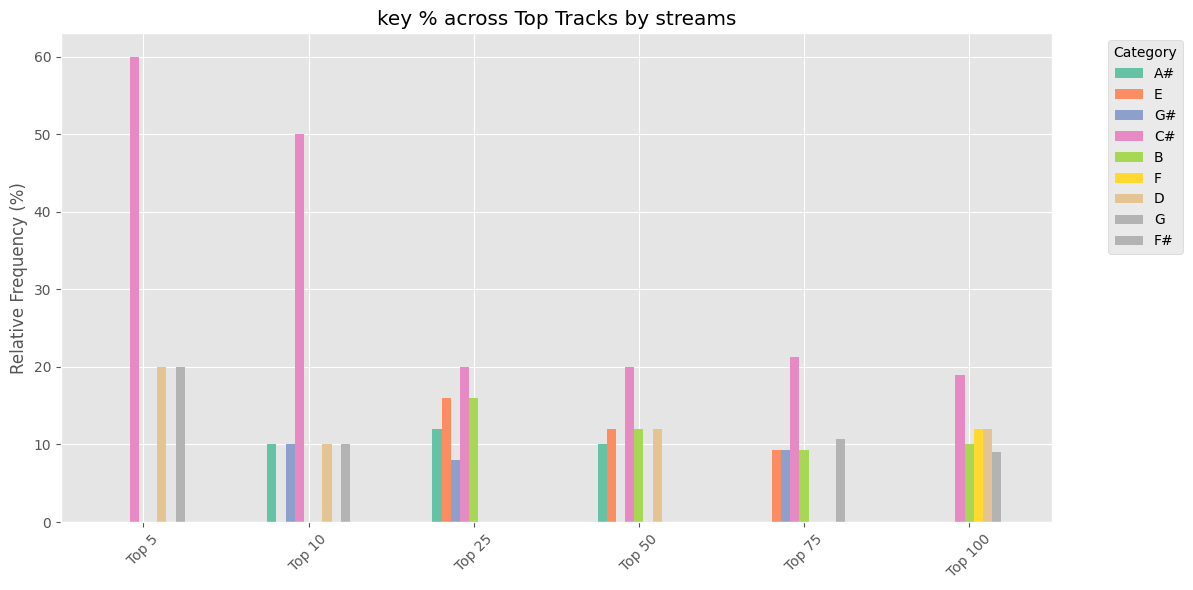

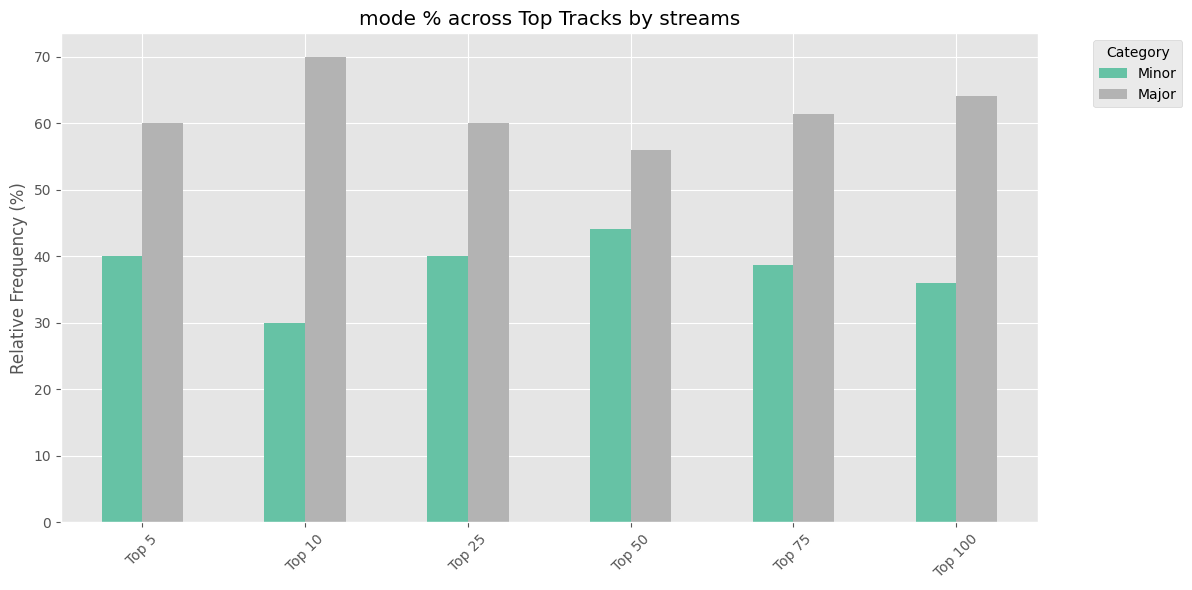

In [580]:
for column in numerical_columns:
    analyze_top("streams",column,numerical=True)
for column in categorical_columns:
    analyze_top("streams",column,numerical=False)


### Comments

- **Tempo (BPM):** There is a subtle preference for higher tempos in popular tracks, suggesting that faster songs may be perceived as more exciting or fresh. However, this tendency does not extend to engagement or total streams, where tempo appears to play a less decisive role.

- **Danceability and valence:** Both popularity and engagement metrics show a clear preference for songs that are danceable and with a positive emotional tone.

- **Energy:** High energy levels are essential for driving engagement, likely because energetic tracks provoke stronger emotional responses. While a minimum level of energy is also important for popularity and total streams, it is not as critical as it is for engagement.

- **Acousticness:** Songs with strong acoustic elements tend to correlate negatively with engagement, possibly due to the high energy required, as commented above. In contrast, acoustic components are more accepted in popular tracks.

- **Instrumentalness:** Highly instrumental songs perform poorly across all considered metrics, indicating that vocals are crucial for success.

- **Liveness and speechiness:** Both of these features appear moderately across all metrics, without being dominant. This suggests that, while some live elements or spoken-word content may add character and autenticity, excessive amounts can limit a song's appeal to a broader audience.

- **Musical keys:** C# emerges as the most successful key across all metrics, followed by D. For engagement specifically, F# performs notably well, while B is highly competitive in terms of popularity.

- **Mode:** There is a clear prefference for the major mode across all metrics. This aligns with the fact that major keys are more typical of Pop music---currently dominant genre---whereas minor keys are more common in Rock.



## Top artists analysis

In this last section, we analyze the top 10 artists (most streams) with the aim of discovering common features in their music.

In [581]:
#Get names of individual artists
artists = {name.strip() for names in df["artist(s)_name"] for name in names.split(",") if name.strip()}

#Collect their stats (numerical features)
artists_avg = {}

for artist in artists:
    subset_df = df[df["artist(s)_name"].str.contains(artist, regex=False)] #regex=False avoids special character issues
    number_of_tracks = len(subset_df)
    total_streams = subset_df["streams"].sum()
    stats = subset_df.select_dtypes(include="number").mean()
    stats["number_of_tracks"] = number_of_tracks
    stats["total_streams"] = total_streams

    artists_avg[artist] = stats

artists_avg_df = pd.DataFrame.from_dict(artists_avg,orient="index")

top_artists = artists_avg_df.sort_values("total_streams",ascending=False).reset_index().rename(columns={"index":"artist"}).head(18)


In [582]:
top_artists = top_artists[~top_artists["artist"].isin(["M", "V", "Bad B"])].reset_index(drop=True)
#Mismatchs that we need to remove...
#"M", "V", and "Bad B" are artists, but clearly their stream count is that high because their name is contained in other artist's names

In [583]:
#We only look at musical features and total_streams
top_artists = top_artists.drop(columns=["released_year","released_month","released_day","streams","in_spotify_playlists","in_spotify_charts","in_apple_playlists","in_apple_charts","number_of_tracks"],axis=1)

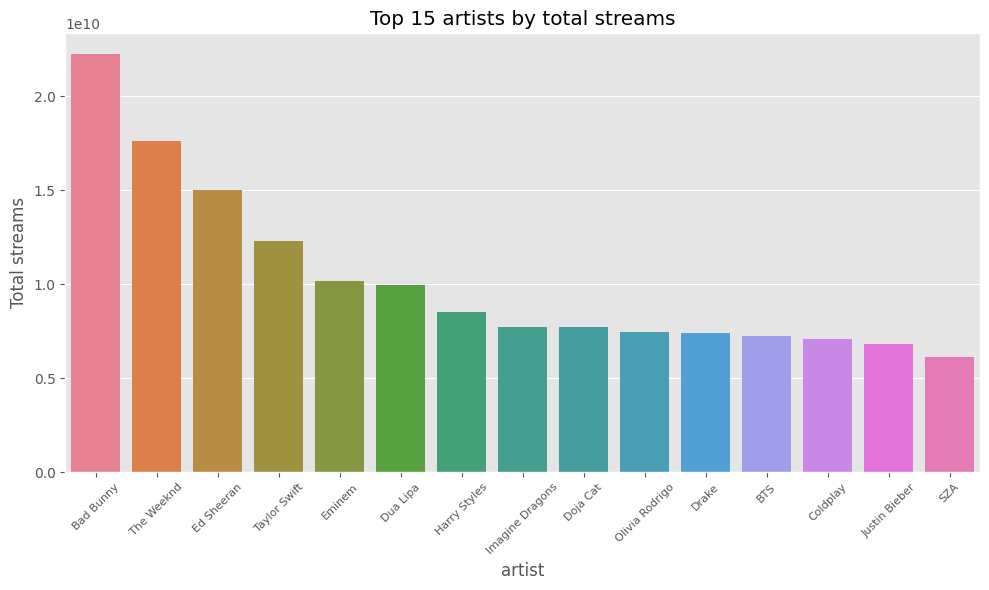

In [584]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_artists,x="artist",y="total_streams",hue="artist")
plt.xticks(fontsize=8, rotation=45)
plt.ylabel("Total streams")
plt.title("Top 15 artists by total streams")

plt.tight_layout()
plt.show()

<Figure size 1800x2000 with 0 Axes>

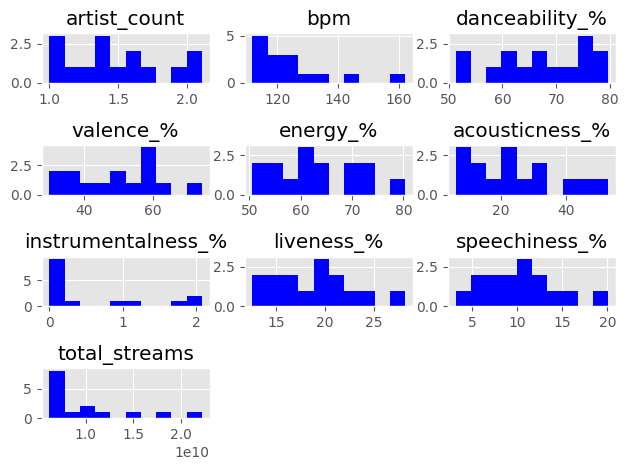

In [585]:

plt.figure(figsize=(18,20))
top_artists.hist(color="blue",bins=10)
plt.tight_layout()
plt.show()

### Comments

- Slower tempos.
- High danceability.
- High energy.
- Balanced valence.
- Some acousticness, liveness, speechiness (not excessive).
- Low instrumentalness